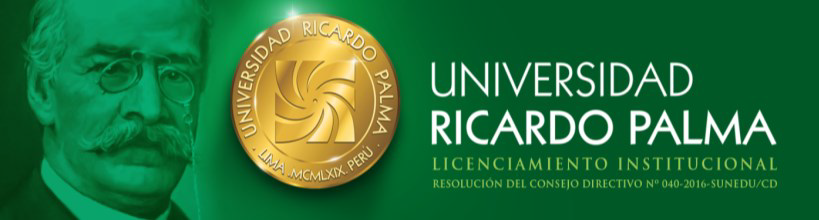

# **Proyecto Tesis:  Deserción Estudiantil Universitaria de la carrera de Ingeniería Electrónica en la Universidad Ricardo Palma :**
**Arboles de Desicion**

**Fred Aviles Caro**

**Ramdon Forest**


In [ ]:
# Importando librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import classification_report
from sklearn import metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # Codificar variables

from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform  #esta funcion nos va a permitir los pesos a manera aleatoria

In [ ]:
import torch
from torch import nn

print(torch.__version__)
#print(torch.cuda.get_device_properties(0))

2.0.1+cu118


In [ ]:
import sys

print("Versión de Python:", sys.version)

Versión de Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]


# Proyecto Tesis:

**Información del conjunto de datos**


Este conjunto de datos contiene información sobre los alumnos de la carera de Ingenieria electronica de la URP, factores:  
SITUACION_MATRICULA,
SITUACION_DEUDA_BOLETA_1,
SITUACION_DEUDA_BOLETA_2,
SITUACION_DEUDA_BOLETA_3,
SITUACION_DEUDA_BOLETA_4,
SITUACION_DEUDA_BOLETA_5,
SITUACION_RECARGO_BOLETA_1,
SITUACION_RECARGO_BOLETA_2,
SITUACION_RECARGO_BOLETA_3,
SITUACION_RECARGO_BOLETA_4,
FACILIDAD_SEMESTRE,
SITUACION_RECARGO_SEMESTRE,
SITUACION_DEUDA_SEMESTRE,
SITUACION_DEUDA_ACUMULADA_ACTUAL,
TRABAJA,
SEXO,
HIJOS,
TIPO_COLEGIO,
PROV_TRASLADO_EXTERNO,
SITUACION_EGRESO,
SITUACION_DESERCION_URP, etc

                            
 Desde Marzo de 20081 hasta septiembre de 2019-0.

**Contenido**


Dataset: Datathon                        
                                                                                                   
          
                          


1. **Importando conjunto de datos**

In [ ]:
# Motar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

ls -l "/content/drive/MyDrive/Maestria en Ciencia de Datos/CUARTO SEMESTRE/20231-1301404-G01-0 Seminario de Tesis III/ProyectoTesis_Experimentacion/RN"

total 20867
-rw------- 1 root root     165 Apr 15 13:19 '~$Presentcion Protocolo de experimentaciones_FredAviles.pptx'
-rw------- 1 root root  464310 Aug  1  2021  clusterElectrónica_base.xlsx
-rw------- 1 root root 2703684 Apr 15 11:38  Data_Ing_Electrónica.csv
-rw------- 1 root root 2738003 Nov 12  2022  Data_Ing_Electrónica.xlsx
-rw------- 1 root root   58858 Nov 25  2022  Diccionario_Variables.docx
-rw------- 1 root root  437523 Apr 15 03:48 'Presentcion Protocolo de experimentaciones_FredAviles.pptx'
-rw------- 1 root root 1677979 Apr 16 00:33 'Proyecto_Tesis_DesercionEstudiantil_RNA (1).ipynb'
-rw------- 1 root root 4516698 Apr 25 05:38  Proyecto_Tesis_DesercionEstudiantil_RNA2_Optimización.ipynb
-rw------- 1 root root 1733583 Apr 23 04:37  Proyecto_Tesis_DesercionEstudiantil_RNA.ipynb
-rw------- 1 root root 7034835 Jun 10 12:41  Proyecto_Tesis_DesercionEstudiantil_RNA_Optimización.ipynb


In [ ]:
# Importando Datasets
#credito_df = pd.read_excel("/content/Data_Ing_Electrónica.xlsx")
electronica_df = pd.read_csv("/content/drive/MyDrive/Maestria en Ciencia de Datos/CUARTO SEMESTRE/20231-1301404-G01-0 Seminario de Tesis III/ProyectoTesis_Experimentacion/RN/Data_Ing_Electrónica.csv", sep=";")

<ipython-input-6-499fb8c1ae5c>:3: DtypeWarning: Columns (93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  electronica_df = pd.read_csv("/content/drive/MyDrive/Maestria en Ciencia de Datos/CUARTO SEMESTRE/20231-1301404-G01-0 Seminario de Tesis III/ProyectoTesis_Experimentacion/RN/Data_Ing_Electrónica.csv", sep=";")


In [ ]:
# Tipo de datos
type(electronica_df)

pandas.core.frame.DataFrame

In [ ]:
# Mostrar cojunto de datos
electronica_df.head(10)

SEMESTRE     TIPO_SEMESTRE         COD_ALUMNO                 CARRERA  \
0     20081   REGULAR CICLO I  ASRESIOR104342008  Ingeniería Electrónica   
1     20082  REGULAR CICLO II  ASRESIOR104342008  Ingeniería Electrónica   
2     20091   REGULAR CICLO I  ASRESIOR104342008  Ingeniería Electrónica   
3     20092  REGULAR CICLO II  ASRESIOR104342008  Ingeniería Electrónica   
4     20101   REGULAR CICLO I  ASRESIOR104342008  Ingeniería Electrónica   
5     20102  REGULAR CICLO II  ASRESIOR104342008  Ingeniería Electrónica   
6     20111   REGULAR CICLO I  ASRESIOR104342008  Ingeniería Electrónica   
7     20112  REGULAR CICLO II  ASRESIOR104342008  Ingeniería Electrónica   
8     20121   REGULAR CICLO I  ASRESIOR104342008  Ingeniería Electrónica   
9     20122  REGULAR CICLO II  ASRESIOR104342008  Ingeniería Electrónica   

   SITUACION_MATRICULA  CURSOSAPROBADOS  CURSOSDESAPROBADOS  CURSOSNSP  \
0                    1                0                   8          0   
1                    0                0                   0          0   
2                    0                0                   0          0   
3                    0                0                   0          0   
4                    0                0                   0          0   
5                    0                0                   0          0   
6                    0                0                   0          0   
7                    0                0                   0          0   
8                    0                0                   0          0   
9                    0                0                   0          0   

   CREDAPROBADOS  CREDDESAPROBADOS  ...  PERIODOS_URP_REGULAR  \
0              0                23  ...                     1   
1              0                 0  ...                     1   
2              0                 0  ...                     1   
3              0                 0  ...                     1   
4              0                 0  ...                     1   
5              0                 0  ...                     1   
6              0                 0  ...                     1   
7              0                 0  ...                     1   
8              0                 0  ...                     1   
9              0                 0  ...                     1   

   PROV_TRASLADO_EXTERNO  PERIODOS_DESERTO_ULT_SEM_URP  \
0                      0                            21   
1                      0                            21   
2                      0                            21   
3                      0                            21   
4                      0                            21   
5                      0                            21   
6                      0                            21   
7                      0                            21   
8                      0                            21   
9                      0                            21   

           CARRERA_ACTUAL  PERIODOS_URP_CARRERA_ACTUAL_REGULAR  \
0  Ingeniería Electrónica                                    1   
1  Ingeniería Electrónica                                    1   
2  Ingeniería Electrónica                                    1   
3  Ingeniería Electrónica                                    1   
4  Ingeniería Electrónica                                    1   
5  Ingeniería Electrónica                                    1   
6  Ingeniería Electrónica                                    1   
7  Ingeniería Electrónica                                    1   
8  Ingeniería Electrónica                                    1   
9  Ingeniería Electrónica                                    1   

   PERIODOS_URP_CARRERA_ACTUAL  PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL  \
0                            0                                         0   
1                            0                                         0   
2                            0           

In [ ]:
# Mostrar la dimension del dataset
electronica_df.shape

(5982, 132)

In [ ]:
# Mostrar la información de los datos
electronica_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5982 entries, 0 to 5981
Columns: 132 entries, SEMESTRE to SITUACION_EGRESO
dtypes: float64(12), int64(104), object(16)
memory usage: 6.0+ MB


#2. **Análisis exploratorio de datos**

In [ ]:
# Eliminar la variable ID
electronica_df=electronica_df.drop(['COD_ALUMNO'], axis=1)

In [ ]:
# Mostrar los descriptivos
electronica_df.describe().transpose()

count          mean        std  \
SEMESTRE                                  5982.0  20145.738215  27.223259   
SITUACION_MATRICULA                       5982.0      0.557339   0.496743   
CURSOSAPROBADOS                           5982.0      1.991307   2.519065   
CURSOSDESAPROBADOS                        5982.0      0.835507   1.451330   
CURSOSNSP                                 5982.0      0.103310   0.568962   
...                                          ...           ...        ...   
PERIODOS_URP_CARRERA_ACTUAL_REGULAR       5982.0      7.020562   5.162830   
PERIODOS_URP_CARRERA_ACTUAL               5982.0      1.417085   1.709870   
PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL  5982.0      0.000000   0.000000   
PRIMER_PERIODO_URP_CARRERA_ACTUAL         5982.0  20112.922601  25.525375   
ULTIMO_PERIODO_URP_CARRERA_ACTUAL         5982.0  20146.302073  33.567325   

                                              min      25%      50%      75%  \
SEMESTRE                                  20081.0  20122.0  20151.0  20171.0   
SITUACION_MATRICULA                           0.0      0.0      1.0      1.0   
CURSOSAPROBADOS                               0.0      0.0      0.0      4.0   
CURSOSDESAPROBADOS                            0.0      0.0      0.0      1.0   
CURSOSNSP                                     0.0      0.0      0.0      0.0   
...                                           ...      ...      ...      ...   
PERIODOS_URP_CARRERA_ACTUAL_REGULAR           1.0      2.0      6.0     12.0   
PERIODOS_URP_CARRERA_ACTUAL                   0.0      0.0      1.0      2.0   
PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL      0.0      0.0      0.0      0.0   
PRIMER_PERIODO_URP_CARRERA_ACTUAL         20081.0  20091.0  20111.0  20131.0   
ULTIMO_PERIODO_URP_CARRERA_ACTUAL         20081.0  20121.0  20151.0  20181.0   

                                              max  
SEMESTRE                                  20190.0  
SITUACION_MATRICULA                           1.0  
CURSOSAPROBADOS                              10.0  
CURSOSDESAPROBADOS                            8.0  
CURSOSNSP                                     8.0  
...                                           ...  
PERIODOS_URP_CARRERA_ACTUAL_REGULAR          20.0  
PERIODOS_URP_CARRERA_ACTUAL                   8.0  
PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL      0.0  
PRIMER_PERIODO_URP_CARRERA_ACTUAL         20182.0  
ULTIMO_PERIODO_URP_CARRERA_ACTUAL         20190.0  

[116 rows x 8 columns]

In [ ]:
# Mostrar los descriptivos
electronica_df.describe(include='all').transpose()

count unique  \
SEMESTRE                                  5982.0    NaN   
TIPO_SEMESTRE                               5982      3   
CARRERA                                     5982      1   
SITUACION_MATRICULA                       5982.0    NaN   
CURSOSAPROBADOS                           5982.0    NaN   
...                                          ...    ...   
PERIODOS_URP_CARRERA_ACTUAL               5982.0    NaN   
PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL  5982.0    NaN   
PRIMER_PERIODO_URP_CARRERA_ACTUAL         5982.0    NaN   
ULTIMO_PERIODO_URP_CARRERA_ACTUAL         5982.0    NaN   
SITUACION_EGRESO                            5982      2   

                                                             top  freq  \
SEMESTRE                                                     NaN   NaN   
TIPO_SEMESTRE                                   REGULAR CICLO II  2789   
CARRERA                                   Ingeniería Electrónica  5982   
SITUACION_MATRICULA                                          NaN   NaN   
CURSOSAPROBADOS                                              NaN   NaN   
...                                                          ...   ...   
PERIODOS_URP_CARRERA_ACTUAL                                  NaN   NaN   
PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL                     NaN   NaN   
PRIMER_PERIODO_URP_CARRERA_ACTUAL                            NaN   NaN   
ULTIMO_PERIODO_URP_CARRERA_ACTUAL                            NaN   NaN   
SITUACION_EGRESO                                       NO EGRESO  4869   

                                                  mean        std      min  \
SEMESTRE                                  20145.738215  27.223259  20081.0   
TIPO_SEMESTRE                                      NaN        NaN      NaN   
CARRERA                                            NaN        NaN      NaN   
SITUACION_MATRICULA                           0.557339   0.496743      0.0   
CURSOSAPROBADOS                               1.991307   2.519065      0.0   
...                                                ...        ...      ...   
PERIODOS_URP_CARRERA_ACTUAL                   1.417085    1.70987      0.0   
PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL           0.0        0.0      0.0   
PRIMER_PERIODO_URP_CARRERA_ACTUAL         20112.922601  25.525375  20081.0   
ULTIMO_PERIODO_URP_CARRERA_ACTUAL         20146.302073  33.567325  20081.0   
SITUACION_EGRESO                                   NaN        NaN      NaN   

                                              25%      50%      75%      max  
SEMESTRE                                  20122.0  20151.0  20171.0  20190.0  
TIPO_SEMESTRE                                 NaN      NaN      NaN      NaN  
CARRERA                                       NaN      NaN      NaN      NaN  
SITUACION_MATRICULA                           0.0      1.0      1.0      1.0  
CURSOSAPROBADOS                               0.0      0.0      4.0     10.0  
...                                           ...      ...      ...      ...  
PERIODOS_URP_CARRERA_ACTUAL                   0.0      1.0      2.0      8.0  
PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL      0.0      0.0      0.0      0.0  
PRIMER_PERIODO_URP_CARRERA_ACTUAL         20091.0  20111.0  20131.0  20182.0  
ULTIMO_PERIODO_URP_CARRERA_ACTUAL         20121.0  20151.0  20181.0  20190.0  
SITUACION_EGRESO                              NaN      NaN      NaN      NaN  

[131 rows x 11 columns]

2.1 Verificación de valores perdidos y corrección

In [ ]:
# Sumar la cantidar de valores perdidos según variables
electronica_df.isnull().sum().tail(60)

SITUACION_DESERCION_AL_SEM                     0
EDAD_PROM_DOCENTE                             71
PERIODOS_CONSECUTIVOS_DESERTO_AL_SEM           0
SITUACION_DEUDA_BOLETA_1                       0
SITUACION_DEUDA_BOLETA_2                       0
SITUACION_DEUDA_BOLETA_3                       0
SITUACION_DEUDA_BOLETA_4                       0
SITUACION_DEUDA_BOLETA_5                       0
SITUACION_RECARGO_BOLETA_1                     0
SITUACION_RECARGO_BOLETA_2                     0
SITUACION_RECARGO_BOLETA_3                     0
SITUACION_RECARGO_BOLETA_4                     0
SITUACION_RECARGO_BOLETA_5                     0
FACILIDAD_SEMESTRE                             0
SITUACION_RECARGO_SEMESTRE                     0
SITUACION_DEUDA_SEMESTRE                       0
SITUACION_DEUDA_ACUMULADA_ACTUAL               0
ESCALA                                      5226
TIPO_BECA                                      0
BECA_ARMADA                                    0
NRO_HERMANOS        

In [ ]:
# Porcentaje de los valores ausentes
#Que tecninas y criterio para corregir los missing
electronica_df.isnull().sum()/electronica_df.shape[0]*100


SEMESTRE                                    0.0
TIPO_SEMESTRE                               0.0
CARRERA                                     0.0
SITUACION_MATRICULA                         0.0
CURSOSAPROBADOS                             0.0
                                           ... 
PERIODOS_URP_CARRERA_ACTUAL                 0.0
PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL    0.0
PRIMER_PERIODO_URP_CARRERA_ACTUAL           0.0
ULTIMO_PERIODO_URP_CARRERA_ACTUAL           0.0
SITUACION_EGRESO                            0.0
Length: 131, dtype: float64

Procedimiento tentativo para el tratamiento de los valores ausentes

Es muy importante el analisis muiltivariante hay patrones de comportamiento de los missings y si hay missings hay varios criterios podria ser eliminar o reemplzar(que criterio utilizo,
hay tecnicas basicas que son las que imputan utilizan medida tendencia central o hay tecnicas avanzadas, se suguere las tecnicas avanzadas)

Si hay correlacion se sugiere no aplicar una tecnica avanzada

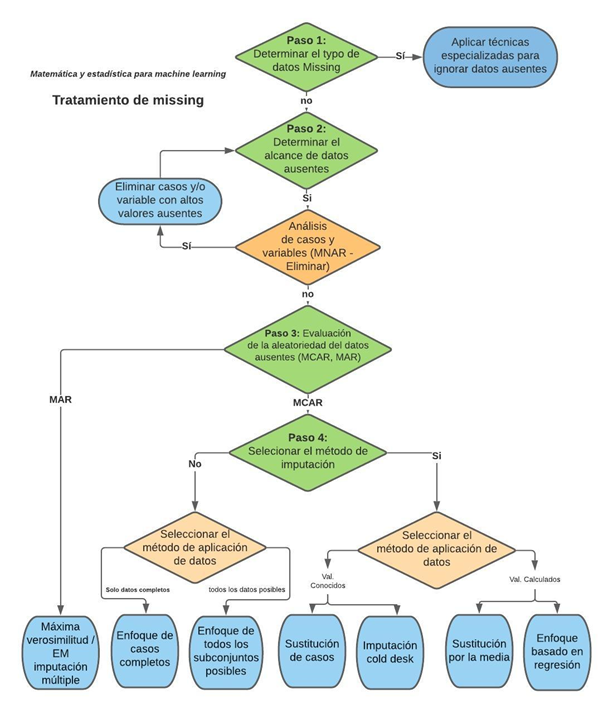

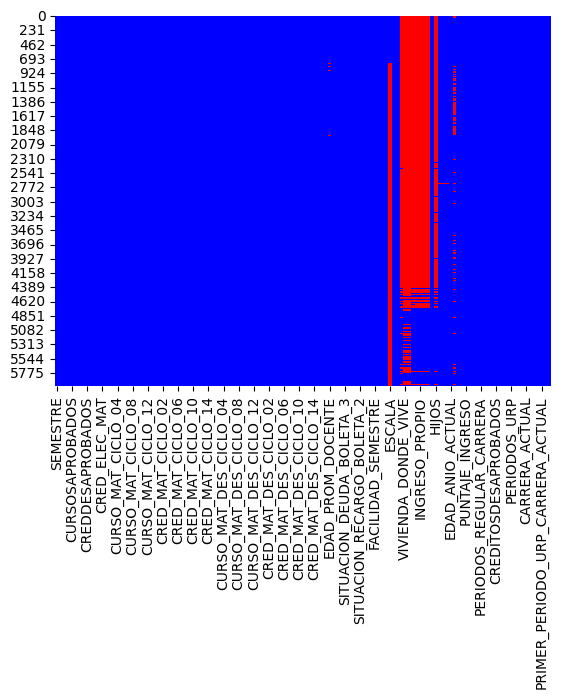

In [ ]:
#Mapa de calor de missing(en este mapa de calor vemos si hay patrones de comportamiento, observaciones que no tienen datos en una variable y no lo tiene en la otra)
#Se aprecia patrones de compartimiento
sns.heatmap(electronica_df.isnull(), cbar=False, cmap="bwr");

El Libro de AM de Hair nos dice: < 0.1 ó < 0.15 el problema es trivial es facil de resolver.

0.15 - 0.20 ! 0.25 ! 0.30 manifiestan que necesitan tecnicas sotisficadas

0.30 - 0.50 se necesitan tecnicas muy acanzadas

> 0.30 el problema o el caso es perjudicial, si yo imputo podria alterar esos resultados, se sugiere se haga prueba la idea no es imputar y continuar trabajando sin evaluar que tanto difiere el resultado de la imputacion  

Hay 3 criterios como: (MCAZ, MAA, MNAA )

MCAZ: Significa que los valores perdidos estan por todo el conjunto de datos no hay una dependencia.

MAA:

MNAA: es cuando hay una dependencia

In [ ]:
# Criterio de eliminación 15% (si esta por encima del 15% lo elimino), (valor cambia según regla de negocio o referencia)
nulos_p= electronica_df.isnull().sum()/electronica_df.shape[0]*100 #me Evalue el porcentaje de nulos
porc_elimiar=15                                                    # mi umbral va ser el 15%
electronica_df_snull=nulos_p[nulos_p<porc_elimiar]                # Mi porcentaje esta debajo del umbral permanezca si no que se elimine
varibles_ok=electronica_df_snull.index
electronica_df=electronica_df[varibles_ok]
electronica_df.head()

SEMESTRE     TIPO_SEMESTRE                 CARRERA  SITUACION_MATRICULA  \
0     20081   REGULAR CICLO I  Ingeniería Electrónica                    1   
1     20082  REGULAR CICLO II  Ingeniería Electrónica                    0   
2     20091   REGULAR CICLO I  Ingeniería Electrónica                    0   
3     20092  REGULAR CICLO II  Ingeniería Electrónica                    0   
4     20101   REGULAR CICLO I  Ingeniería Electrónica                    0   

   CURSOSAPROBADOS  CURSOSDESAPROBADOS  CURSOSNSP  CREDAPROBADOS  \
0                0                   8          0              0   
1                0                   0          0              0   
2                0                   0          0              0   
3                0                   0          0              0   
4                0                   0          0              0   

   CREDDESAPROBADOS  CREDNSP  ...  PERIODOS_URP_REGULAR  \
0                23        0  ...                     1   
1                 0        0  ...                     1   
2                 0        0  ...                     1   
3                 0        0  ...                     1   
4                 0        0  ...                     1   

   PROV_TRASLADO_EXTERNO  PERIODOS_DESERTO_ULT_SEM_URP  \
0                      0                            21   
1                      0                            21   
2                      0                            21   
3                      0                            21   
4                      0                            21   

           CARRERA_ACTUAL  PERIODOS_URP_CARRERA_ACTUAL_REGULAR  \
0  Ingeniería Electrónica                                    1   
1  Ingeniería Electrónica                                    1   
2  Ingeniería Electrónica                                    1   
3  Ingeniería Electrónica                                    1   
4  Ingeniería Electrónica                                    1   

   PERIODOS_URP_CARRERA_ACTUAL  PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL  \
0                            0                                         0   
1                            0                                         0   
2                            0                                         0   
3                            0                                         0   
4                            0                                         0   

   PRIMER_PERIODO_URP_CARRERA_ACTUAL  ULTIMO_PERIODO_URP_CARRERA_ACTUAL  \
0                              20081                              20081   
1                              20081                              20081   
2                              20081                              20081   
3                              20081                              20081   
4                              20081                              20081   

   SITUACION_EGRESO  
0         NO EGRESO  
1         NO EGRESO  
2         NO EGRESO  
3         NO EGRESO  
4         NO EGRESO  

[5 rows x 120 columns]

Evaluar patrones de comportamiento missing

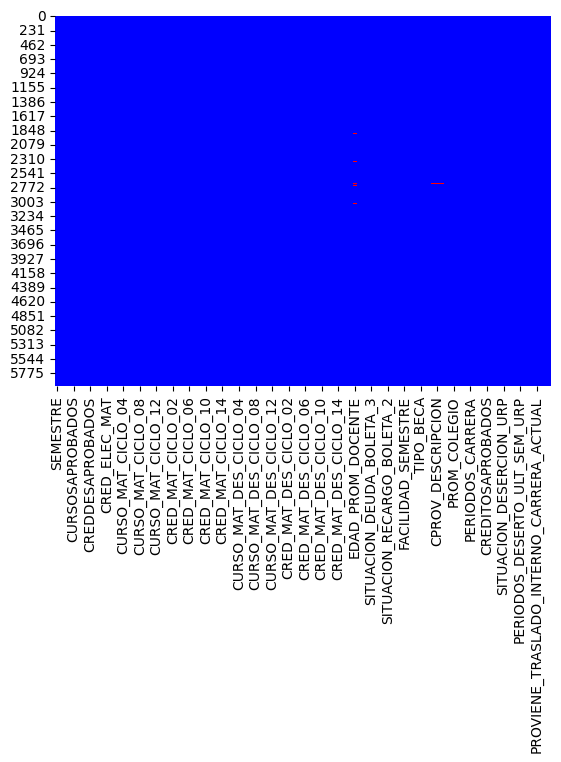

In [ ]:
sns.heatmap(electronica_df.isnull(), cbar=False, cmap="bwr");

Evaluar correlaciones entre los datos perdidos

Si yo pido un coeficiente de correlacion

Decinos que si el nivel esta por debajo de 0.3 o 0.35 es una correlacion no significativa y si esta entre 0.35 y 0.5 es una correlacion moderada y si esta 0.5 y 0.75 ó 0.8 la correlacion es fuerte y si es superior a 0.75 ó 0.8 la correlacion es muy fuerte.

Corrección de valores ausentes

In [ ]:
#Imputacion (como el porcentaje es muy pequeño se usa esta tecnica de "Secuencia de valores")
electronica_df = electronica_df.fillna(method = 'backfill')

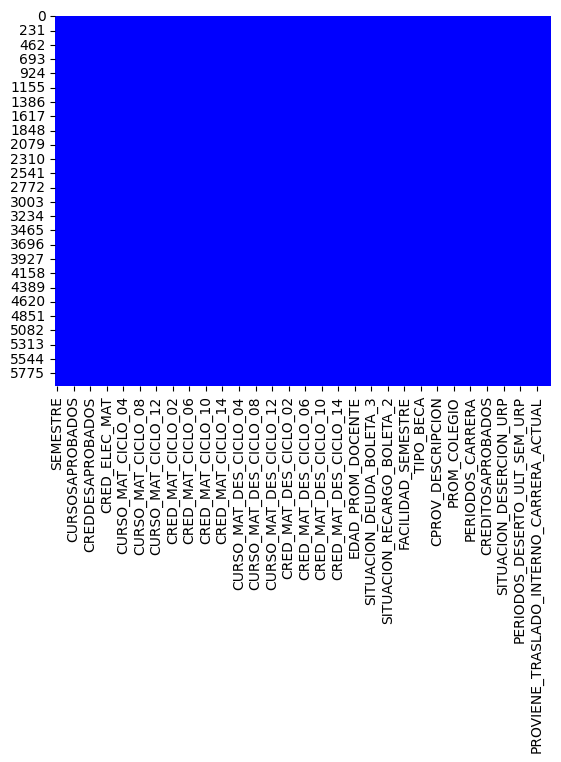

In [ ]:
#Correaboramos si ya no hay missing
sns.heatmap(electronica_df.isnull(), cbar=False, cmap="bwr");

In [ ]:
#Porcentaje de los valores ausentes
electronica_df.isnull().sum()/electronica_df.shape[0]*100

SEMESTRE                                    0.0
TIPO_SEMESTRE                               0.0
CARRERA                                     0.0
SITUACION_MATRICULA                         0.0
CURSOSAPROBADOS                             0.0
                                           ... 
PERIODOS_URP_CARRERA_ACTUAL                 0.0
PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL    0.0
PRIMER_PERIODO_URP_CARRERA_ACTUAL           0.0
ULTIMO_PERIODO_URP_CARRERA_ACTUAL           0.0
SITUACION_EGRESO                            0.0
Length: 120, dtype: float64

In [ ]:
electronica_df.isnull().sum().tail(60)

CRED_MAT_DES_CICLO_06                       0
CRED_MAT_DES_CICLO_07                       0
CRED_MAT_DES_CICLO_08                       0
CRED_MAT_DES_CICLO_09                       0
CRED_MAT_DES_CICLO_10                       0
CRED_MAT_DES_CICLO_11                       0
CRED_MAT_DES_CICLO_12                       0
CRED_MAT_DES_CICLO_13                       0
CRED_MAT_DES_CICLO_14                       0
PORC_ASISTENCIA                             0
EDAD_ANIO_ESTUDIO                           0
SITUACION_DESERCION_AL_SEM                  0
EDAD_PROM_DOCENTE                           0
PERIODOS_CONSECUTIVOS_DESERTO_AL_SEM        0
SITUACION_DEUDA_BOLETA_1                    0
SITUACION_DEUDA_BOLETA_2                    0
SITUACION_DEUDA_BOLETA_3                    0
SITUACION_DEUDA_BOLETA_4                    0
SITUACION_DEUDA_BOLETA_5                    0
SITUACION_RECARGO_BOLETA_1                  0
SITUACION_RECARGO_BOLETA_2                  0
SITUACION_RECARGO_BOLETA_3        

In [ ]:
# Mostrar los descriptivos
electronica_df.describe().transpose()

count          mean        std  \
SEMESTRE                                  5982.0  20145.738215  27.223259   
SITUACION_MATRICULA                       5982.0      0.557339   0.496743   
CURSOSAPROBADOS                           5982.0      1.991307   2.519065   
CURSOSDESAPROBADOS                        5982.0      0.835507   1.451330   
CURSOSNSP                                 5982.0      0.103310   0.568962   
...                                          ...           ...        ...   
PERIODOS_URP_CARRERA_ACTUAL_REGULAR       5982.0      7.020562   5.162830   
PERIODOS_URP_CARRERA_ACTUAL               5982.0      1.417085   1.709870   
PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL  5982.0      0.000000   0.000000   
PRIMER_PERIODO_URP_CARRERA_ACTUAL         5982.0  20112.922601  25.525375   
ULTIMO_PERIODO_URP_CARRERA_ACTUAL         5982.0  20146.302073  33.567325   

                                              min      25%      50%      75%  \
SEMESTRE                                  20081.0  20122.0  20151.0  20171.0   
SITUACION_MATRICULA                           0.0      0.0      1.0      1.0   
CURSOSAPROBADOS                               0.0      0.0      0.0      4.0   
CURSOSDESAPROBADOS                            0.0      0.0      0.0      1.0   
CURSOSNSP                                     0.0      0.0      0.0      0.0   
...                                           ...      ...      ...      ...   
PERIODOS_URP_CARRERA_ACTUAL_REGULAR           1.0      2.0      6.0     12.0   
PERIODOS_URP_CARRERA_ACTUAL                   0.0      0.0      1.0      2.0   
PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL      0.0      0.0      0.0      0.0   
PRIMER_PERIODO_URP_CARRERA_ACTUAL         20081.0  20091.0  20111.0  20131.0   
ULTIMO_PERIODO_URP_CARRERA_ACTUAL         20081.0  20121.0  20151.0  20181.0   

                                              max  
SEMESTRE                                  20190.0  
SITUACION_MATRICULA                           1.0  
CURSOSAPROBADOS                              10.0  
CURSOSDESAPROBADOS                            8.0  
CURSOSNSP                                     8.0  
...                                           ...  
PERIODOS_URP_CARRERA_ACTUAL_REGULAR          20.0  
PERIODOS_URP_CARRERA_ACTUAL                   8.0  
PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL      0.0  
PRIMER_PERIODO_URP_CARRERA_ACTUAL         20182.0  
ULTIMO_PERIODO_URP_CARRERA_ACTUAL         20190.0  

[109 rows x 8 columns]

In [ ]:
# Mostrar los descriptivos
electronica_df.describe(include="all").transpose()

count unique  \
SEMESTRE                                  5982.0    NaN   
TIPO_SEMESTRE                               5982      3   
CARRERA                                     5982      1   
SITUACION_MATRICULA                       5982.0    NaN   
CURSOSAPROBADOS                           5982.0    NaN   
...                                          ...    ...   
PERIODOS_URP_CARRERA_ACTUAL               5982.0    NaN   
PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL  5982.0    NaN   
PRIMER_PERIODO_URP_CARRERA_ACTUAL         5982.0    NaN   
ULTIMO_PERIODO_URP_CARRERA_ACTUAL         5982.0    NaN   
SITUACION_EGRESO                            5982      2   

                                                             top  freq  \
SEMESTRE                                                     NaN   NaN   
TIPO_SEMESTRE                                   REGULAR CICLO II  2789   
CARRERA                                   Ingeniería Electrónica  5982   
SITUACION_MATRICULA                                          NaN   NaN   
CURSOSAPROBADOS                                              NaN   NaN   
...                                                          ...   ...   
PERIODOS_URP_CARRERA_ACTUAL                                  NaN   NaN   
PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL                     NaN   NaN   
PRIMER_PERIODO_URP_CARRERA_ACTUAL                            NaN   NaN   
ULTIMO_PERIODO_URP_CARRERA_ACTUAL                            NaN   NaN   
SITUACION_EGRESO                                       NO EGRESO  4869   

                                                  mean        std      min  \
SEMESTRE                                  20145.738215  27.223259  20081.0   
TIPO_SEMESTRE                                      NaN        NaN      NaN   
CARRERA                                            NaN        NaN      NaN   
SITUACION_MATRICULA                           0.557339   0.496743      0.0   
CURSOSAPROBADOS                               1.991307   2.519065      0.0   
...                                                ...        ...      ...   
PERIODOS_URP_CARRERA_ACTUAL                   1.417085    1.70987      0.0   
PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL           0.0        0.0      0.0   
PRIMER_PERIODO_URP_CARRERA_ACTUAL         20112.922601  25.525375  20081.0   
ULTIMO_PERIODO_URP_CARRERA_ACTUAL         20146.302073  33.567325  20081.0   
SITUACION_EGRESO                                   NaN        NaN      NaN   

                                              25%      50%      75%      max  
SEMESTRE                                  20122.0  20151.0  20171.0  20190.0  
TIPO_SEMESTRE                                 NaN      NaN      NaN      NaN  
CARRERA                                       NaN      NaN      NaN      NaN  
SITUACION_MATRICULA                           0.0      1.0      1.0      1.0  
CURSOSAPROBADOS                               0.0      0.0      4.0     10.0  
...                                           ...      ...      ...      ...  
PERIODOS_URP_CARRERA_ACTUAL                   0.0      1.0      2.0      8.0  
PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL      0.0      0.0      0.0      0.0  
PRIMER_PERIODO_URP_CARRERA_ACTUAL         20091.0  20111.0  20131.0  20182.0  
ULTIMO_PERIODO_URP_CARRERA_ACTUAL         20121.0  20151.0  20181.0  20190.0  
SITUACION_EGRESO                              NaN      NaN      NaN      NaN  

[120 rows x 11 columns]

In [ ]:
import seaborn as sns    #Graficar y ver los valores missing
import missingno as msno

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


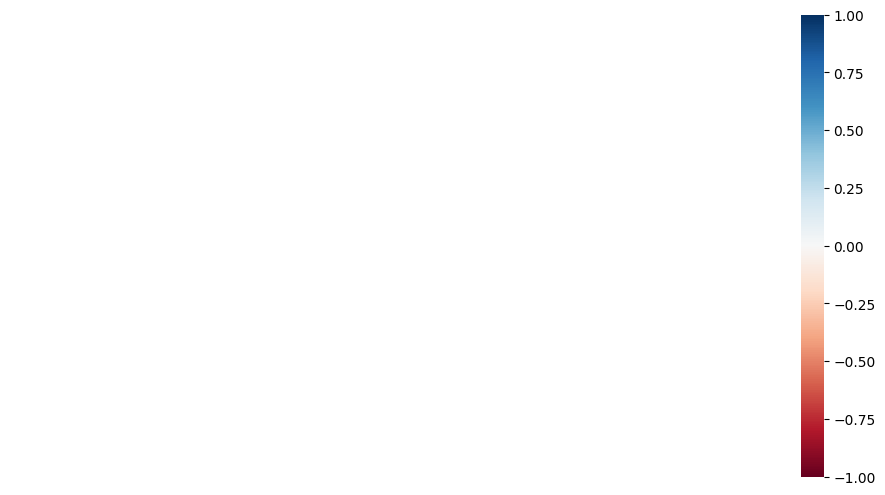

In [ ]:
#Evaluar la correlación de nulidad: qué tan fuertemente la presencia o ausencia de una variable afecta la presencia de otra:
msno.heatmap(electronica_df, figsize=(12,6));

2.2 Gráficos estadísticos

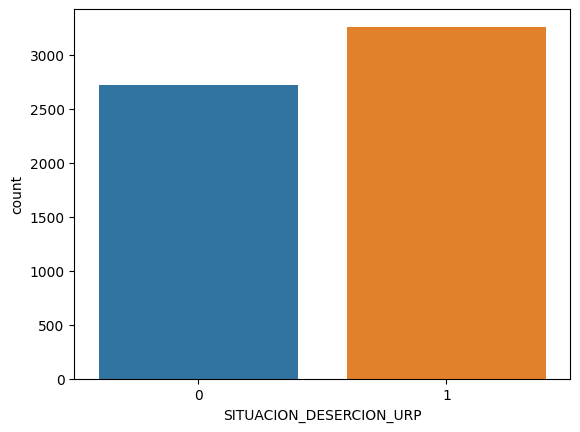

In [ ]:
# Graficando la variable salida(con el objetivo de evaluar si estamos en un sistema desbalanceado )
#Vemos que no hay mucha diferencia entre las cantidades de 0 que 1 no es un probema muy grave de datos desbalanceados y si lo hubiera se podrioa aplicar un criterio o tecnica de desbalancear la data
#Para mejorar el rendimiento del modelo se aplica una tecnica de balanceo de dato y despúes de correr de nuevo el modelo verificamos si ha mejorado, se va aplicar mas adelante en otra data(son modelos de aprendizaje modelo de prueba de error)
sns.countplot(x="SITUACION_DESERCION_URP", data=electronica_df);

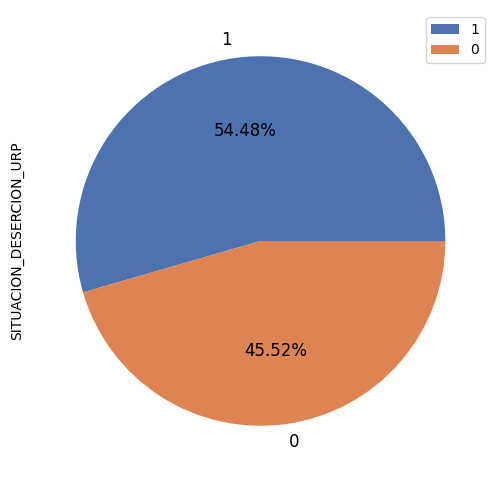

In [ ]:
# Graficando la variable salida
values = electronica_df['SITUACION_DESERCION_URP'].value_counts()
colors = sns.color_palette('deep')
plt.figure(figsize=(6,6))
values.plot(kind='pie', colors = colors,fontsize=12, autopct='%1.2f%%')
plt.legend(labels=values.index)
plt.show()

Nota: No tenemos un caso de datos desbalanceados (recomendación) No balancear los datos

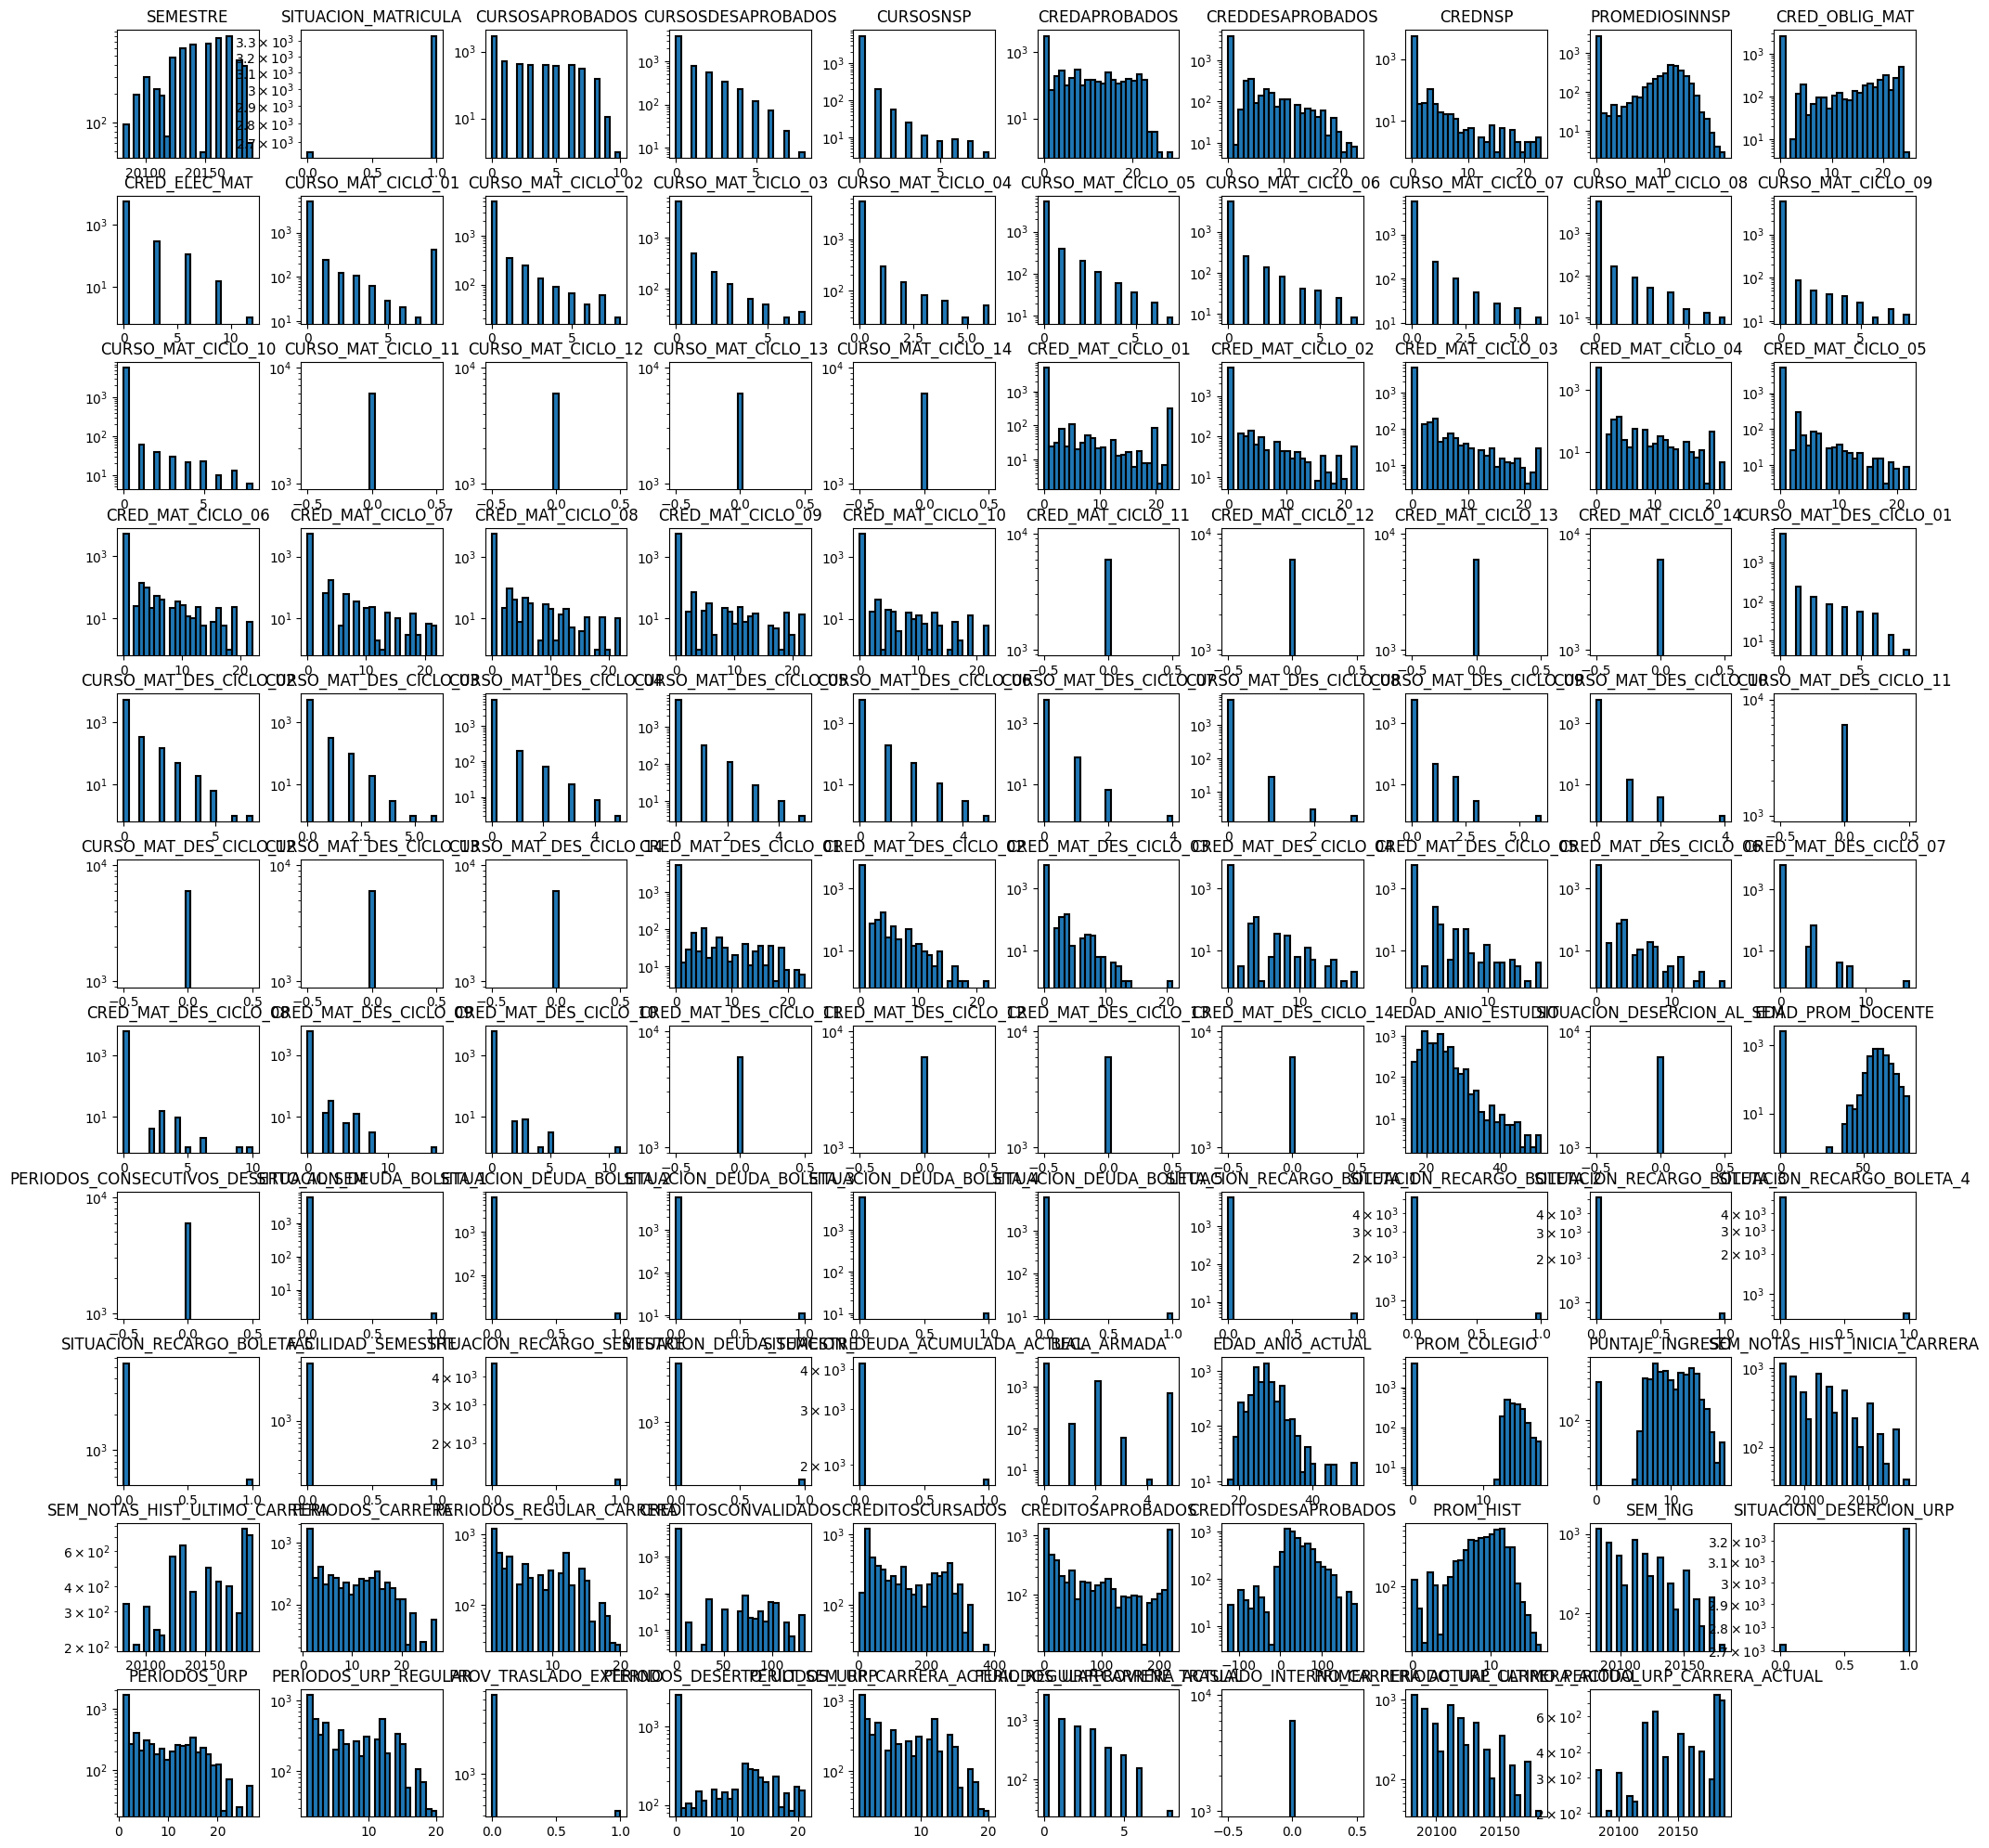

In [ ]:
# Histogramas de las variables
electronica_df.hist(edgecolor='black' , log=True, linewidth=1.5, bins=25, grid=False, figsize=(25, 25))
plt.show()

In [ ]:
# Correlaciones(Pearson/todas las variables )
#Mapa de calor de la correlacion de todas las variables
#Nos interesa cual es la variables que esta mas relacionada que tiene una ralacion lineal con la target
#sns.set(rc={'figure.figsize':(10,8)})
#sns.heatmap(data= electronica_df.corr().round(1) , annot=True);

In [ ]:
# Correlaciones entre variables
electronica_df.corr().style.background_gradient()

<ipython-input-24-a307928515c4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  electronica_df.corr().style.background_gradient()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


<ipython-input-29-c4b5ae4b29c0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(electronica_df.corr());


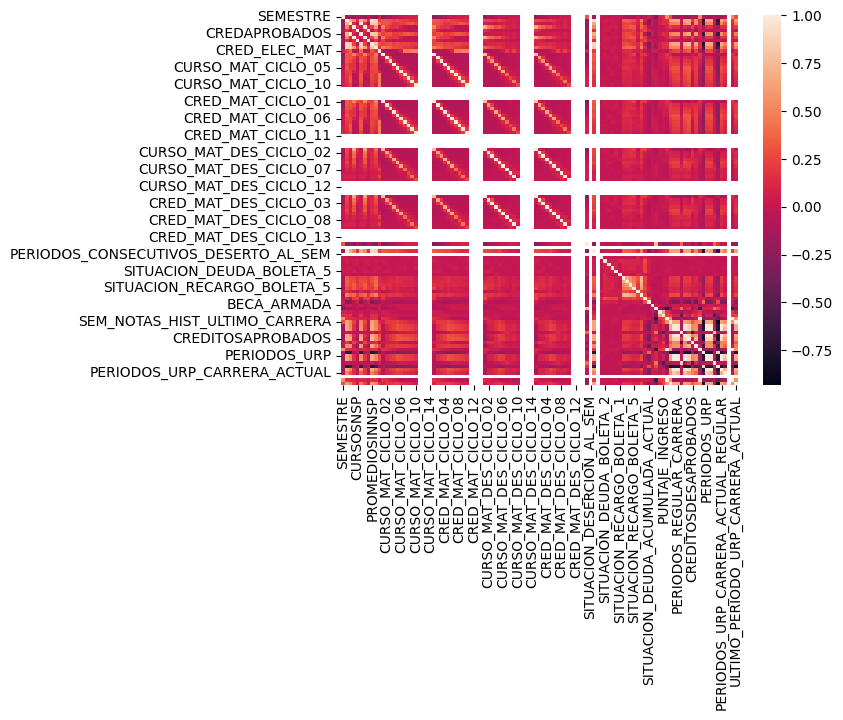

In [ ]:
# Verificar correlaciones entre las variables
sns.heatmap(electronica_df.corr());

In [ ]:
# Mostrar la dimension del dataset
electronica_df.shape

(5982, 120)

In [ ]:
# Correlaciones con la variable de salida(es importante la correlacion dela variable objetivo(SITUACION_DESERCION_URP)con las demas variables )
electronica_df.corr()["SITUACION_DESERCION_URP"].tail(60)

<ipython-input-26-8aa3d756e501>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  electronica_df.corr()["SITUACION_DESERCION_URP"].tail(60)


CURSO_MAT_DES_CICLO_11                           NaN
CURSO_MAT_DES_CICLO_12                           NaN
CURSO_MAT_DES_CICLO_13                           NaN
CURSO_MAT_DES_CICLO_14                           NaN
CRED_MAT_DES_CICLO_01                       0.070451
CRED_MAT_DES_CICLO_02                      -0.056037
CRED_MAT_DES_CICLO_03                      -0.072434
CRED_MAT_DES_CICLO_04                      -0.134966
CRED_MAT_DES_CICLO_05                      -0.188392
CRED_MAT_DES_CICLO_06                      -0.168019
CRED_MAT_DES_CICLO_07                      -0.093105
CRED_MAT_DES_CICLO_08                      -0.074032
CRED_MAT_DES_CICLO_09                      -0.102143
CRED_MAT_DES_CICLO_10                      -0.054521
CRED_MAT_DES_CICLO_11                            NaN
CRED_MAT_DES_CICLO_12                            NaN
CRED_MAT_DES_CICLO_13                            NaN
CRED_MAT_DES_CICLO_14                            NaN
EDAD_ANIO_ESTUDIO                           0.

In [ ]:
# Correlaciones con la variable de salida(es importante la correlacion dela variable objetivo(SITUACION_DESERCION_URP)con las demas variables )
electronica_df.corr()["SITUACION_DESERCION_URP"].head(60)

<ipython-input-27-a4c9d70b692e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  electronica_df.corr()["SITUACION_DESERCION_URP"].head(60)


SEMESTRE                 -0.031790
SITUACION_MATRICULA      -0.718657
CURSOSAPROBADOS          -0.638451
CURSOSDESAPROBADOS       -0.150335
CURSOSNSP                 0.023787
CREDAPROBADOS            -0.655726
CREDDESAPROBADOS         -0.153788
CREDNSP                   0.023748
PROMEDIOSINNSP           -0.769199
CRED_OBLIG_MAT           -0.585069
CRED_ELEC_MAT            -0.270529
CURSO_MAT_CICLO_01       -0.037480
CURSO_MAT_CICLO_02       -0.187168
CURSO_MAT_CICLO_03       -0.203094
CURSO_MAT_CICLO_04       -0.228315
CURSO_MAT_CICLO_05       -0.287191
CURSO_MAT_CICLO_06       -0.266908
CURSO_MAT_CICLO_07       -0.243107
CURSO_MAT_CICLO_08       -0.231997
CURSO_MAT_CICLO_09       -0.204171
CURSO_MAT_CICLO_10       -0.169583
CURSO_MAT_CICLO_11             NaN
CURSO_MAT_CICLO_12             NaN
CURSO_MAT_CICLO_13             NaN
CURSO_MAT_CICLO_14             NaN
CRED_MAT_CICLO_01        -0.031384
CRED_MAT_CICLO_02        -0.179527
CRED_MAT_CICLO_03        -0.204897
CRED_MAT_CICLO_04   

<ipython-input-28-e436f6a0f7f1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  electronica_df.corr()["SITUACION_DESERCION_URP"][:-1].sort_values().plot(kind="bar");


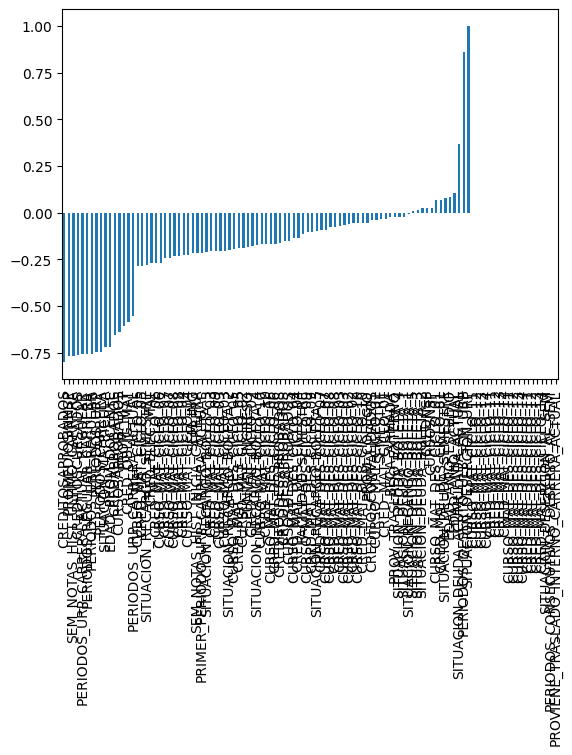

In [ ]:
# Grafica de correlaciones con la variable de salida
electronica_df.corr()["SITUACION_DESERCION_URP"][:-1].sort_values().plot(kind="bar");

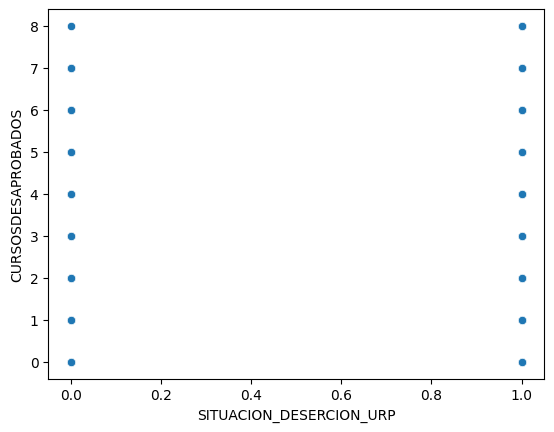

In [ ]:
# Generar un diagrama de dispersión de las variables de entrada con la salida(El diagrama de dispersion se interpreta se plantea para variables numericas,
#para ver si hay cierto grado de correlacion lineal entre estas variables, su comportamiento lineal entre las variables )
sns.scatterplot(x="SITUACION_DESERCION_URP", y="CURSOSDESAPROBADOS", data=electronica_df);

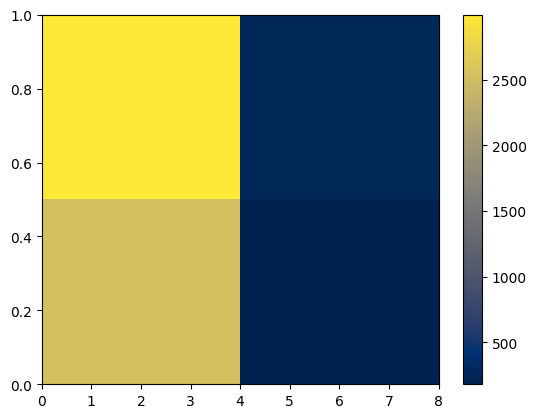

In [ ]:
# Cambiaando el gráfico tuilizando bins
# Cambiando el gráfico utilizando bins(mapa de calor de la variable con la clases, se esta haciendo es aplastando a un nuevo grafico con mapa de calor donde se sintetiza la cantidad de elemento)
#va mostrar el que mas pintado este amarillo significa que los datos este mas cargado ahi entre 0-5-1.0
plt.hist2d(electronica_df["CURSOSDESAPROBADOS"],electronica_df["SITUACION_DESERCION_URP"],
           bins=(2,2), cmap=plt.cm.cividis)
plt.colorbar()
plt.show()

In [ ]:
# Verificar las columnas categóticas
for categoricas in ['SITUACION_MATRICULA',	'SITUACION_DEUDA_BOLETA_1'	,'SITUACION_DEUDA_BOLETA_2',	'SITUACION_DEUDA_BOLETA_3'	,'SITUACION_DEUDA_BOLETA_4','SITUACION_DEUDA_BOLETA_5',
                        'SITUACION_RECARGO_BOLETA_1','SITUACION_RECARGO_BOLETA_2','SITUACION_RECARGO_BOLETA_3','SITUACION_RECARGO_BOLETA_4','FACILIDAD_SEMESTRE','SITUACION_RECARGO_SEMESTRE',
                        'SITUACION_DEUDA_SEMESTRE','SITUACION_DEUDA_ACUMULADA_ACTUAL','SEXO','TIPO_COLEGIO','PROV_TRASLADO_EXTERNO','SITUACION_EGRESO','SITUACION_DESERCION_URP','TIPO_SEMESTRE','TIPO_BECA'] :
    print(electronica_df[categoricas].value_counts())
    print()

1    3334
0    2648
Name: SITUACION_MATRICULA, dtype: int64

0    5980
1       2
Name: SITUACION_DEUDA_BOLETA_1, dtype: int64

0    5968
1      14
Name: SITUACION_DEUDA_BOLETA_2, dtype: int64

0    5971
1      11
Name: SITUACION_DEUDA_BOLETA_3, dtype: int64

0    5972
1      10
Name: SITUACION_DEUDA_BOLETA_4, dtype: int64

0    5970
1      12
Name: SITUACION_DEUDA_BOLETA_5, dtype: int64

0    5977
1       5
Name: SITUACION_RECARGO_BOLETA_1, dtype: int64

0    5167
1     815
Name: SITUACION_RECARGO_BOLETA_2, dtype: int64

0    5133
1     849
Name: SITUACION_RECARGO_BOLETA_3, dtype: int64

0    5261
1     721
Name: SITUACION_RECARGO_BOLETA_4, dtype: int64

0    5814
1     168
Name: FACILIDAD_SEMESTRE, dtype: int64

0    4612
1    1370
Name: SITUACION_RECARGO_SEMESTRE, dtype: int64

0    5798
1     184
Name: SITUACION_DEUDA_SEMESTRE, dtype: int64

0    4176
1    1806
Name: SITUACION_DEUDA_ACUMULADA_ACTUAL, dtype: int64

M    5669
F     313
Name: SEXO, dtype: int64

PARTICULAR    4134
ESTA

In [ ]:
cambio_sex = {"SEXO": {"M": 0, "F": 1}}
cambio_coleg = {"TIPO_COLEGIO": {"PARTICULAR": 0, "ESTATAL": 1}}
cambio_egres = {"SITUACION_EGRESO": {"NO EGRESO": 0, "EGRESO": 1}}
electronica_df = electronica_df.replace(cambio_sex)
electronica_df = electronica_df.replace(cambio_coleg)
electronica_df = electronica_df.replace(cambio_egres)
electronica_df.head()

SEMESTRE     TIPO_SEMESTRE                 CARRERA  SITUACION_MATRICULA  \
0     20081   REGULAR CICLO I  Ingeniería Electrónica                    1   
1     20082  REGULAR CICLO II  Ingeniería Electrónica                    0   
2     20091   REGULAR CICLO I  Ingeniería Electrónica                    0   
3     20092  REGULAR CICLO II  Ingeniería Electrónica                    0   
4     20101   REGULAR CICLO I  Ingeniería Electrónica                    0   

   CURSOSAPROBADOS  CURSOSDESAPROBADOS  CURSOSNSP  CREDAPROBADOS  \
0                0                   8          0              0   
1                0                   0          0              0   
2                0                   0          0              0   
3                0                   0          0              0   
4                0                   0          0              0   

   CREDDESAPROBADOS  CREDNSP  ...  PERIODOS_URP_REGULAR  \
0                23        0  ...                     1   
1                 0        0  ...                     1   
2                 0        0  ...                     1   
3                 0        0  ...                     1   
4                 0        0  ...                     1   

   PROV_TRASLADO_EXTERNO  PERIODOS_DESERTO_ULT_SEM_URP  \
0                      0                            21   
1                      0                            21   
2                      0                            21   
3                      0                            21   
4                      0                            21   

           CARRERA_ACTUAL  PERIODOS_URP_CARRERA_ACTUAL_REGULAR  \
0  Ingeniería Electrónica                                    1   
1  Ingeniería Electrónica                                    1   
2  Ingeniería Electrónica                                    1   
3  Ingeniería Electrónica                                    1   
4  Ingeniería Electrónica                                    1   

   PERIODOS_URP_CARRERA_ACTUAL  PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL  \
0                            0                                         0   
1                            0                                         0   
2                            0                                         0   
3                            0                                         0   
4                            0                                         0   

   PRIMER_PERIODO_URP_CARRERA_ACTUAL  ULTIMO_PERIODO_URP_CARRERA_ACTUAL  \
0                              20081                              20081   
1                              20081                              20081   
2                              20081                              20081   
3                              20081                              20081   
4                              20081                              20081   

   SITUACION_EGRESO  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 120 columns]

In [ ]:
#Aplicación de varibles ficticias para las variables no numéricas con más de 2 categorias
columnas_dummies=['TIPO_SEMESTRE','TIPO_BECA']
electronica_df=pd.get_dummies(electronica_df, columns=columnas_dummies)

In [ ]:
electronica_df.head()

SEMESTRE                 CARRERA  SITUACION_MATRICULA  CURSOSAPROBADOS  \
0     20081  Ingeniería Electrónica                    1                0   
1     20082  Ingeniería Electrónica                    0                0   
2     20091  Ingeniería Electrónica                    0                0   
3     20092  Ingeniería Electrónica                    0                0   
4     20101  Ingeniería Electrónica                    0                0   

   CURSOSDESAPROBADOS  CURSOSNSP  CREDAPROBADOS  CREDDESAPROBADOS  CREDNSP  \
0                   8          0              0                23        0   
1                   0          0              0                 0        0   
2                   0          0              0                 0        0   
3                   0          0              0                 0        0   
4                   0          0              0                 0        0   

   PROMEDIOSINNSP  ...  TIPO_BECA_CONVENIO MARINA DE GUERRA DEL PERU  \
0          5.5217  ...                                             0   
1          0.0000  ...                                             0   
2          0.0000  ...                                             0   
3          0.0000  ...                                             0   
4          0.0000  ...                                             0   

   TIPO_BECA_CONVENIO POLICIA NACIONAL  TIPO_BECA_DEPORTITAS CALIFICADOS  \
0                                    0                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   TIPO_BECA_DSCTO. HIJOS DE GRADUADOS DE URP  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   TIPO_BECA_DSCTO. PADRES CON VARIOS HIJOS  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   TIPO_BECA_HIJO DE DOCENTE TIEMPO COMPLETO  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   TIPO_BECA_HIJO DE DOCENTE TIEMPO PARCIAL  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   TIPO_BECA_HIJO DE TRABAJADOR ADMINISTRATIVO  TIPO_BECA_SIN BECA  \
0                                            0                   1   
1                                            0                   1   
2                                            0                   1   
3                                            0                   1   
4                                            0                   1   

   TIPO_BECA_TRABAJADOR ADMINISTRATIVO  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0  

[5 rows x 136 columns]

In [ ]:
#Serapara columnas según tipo de variable
#columnas_categoricas = [	'SITUACION_MATRICULA',	'SITUACION_DEUDA_BOLETA_1'	,'SITUACION_DEUDA_BOLETA_2',	'SITUACION_DEUDA_BOLETA_3'	,'SITUACION_DEUDA_BOLETA_4','SITUACION_DEUDA_BOLETA_5',
 #                       'SITUACION_RECARGO_BOLETA_1','SITUACION_RECARGO_BOLETA_2','SITUACION_RECARGO_BOLETA_3','SITUACION_RECARGO_BOLETA_4','FACILIDAD_SEMESTRE','SITUACION_RECARGO_SEMESTRE',
  #                      'SITUACION_DEUDA_SEMESTRE','SITUACION_DEUDA_ACUMULADA_ACTUAL','SEXO','TIPO_COLEGIO','PROV_TRASLADO_EXTERNO','SITUACION_EGRESO','SITUACION_DESERCION_URP']
#columnas_numericas   = ['SEMESTRE'	,'CURSOSAPROBADOS',	'CURSOSDESAPROBADOS'	,'CURSOSNSP'	,'PROMEDIOSINNSP',	'CRED_OBLIG_MAT','CRED_ELEC_MAT','CURSO_MAT_CICLO_01','CURSO_MAT_CICLO_02',
 #                       'CURSO_MAT_CICLO_03','CURSO_MAT_CICLO_04','CURSO_MAT_CICLO_05','CURSO_MAT_CICLO_06','CURSO_MAT_CICLO_07','CURSO_MAT_CICLO_08','CURSO_MAT_CICLO_09','CURSO_MAT_CICLO_10',
  #                      'CRED_MAT_CICLO_01','CRED_MAT_CICLO_02','CRED_MAT_CICLO_03','CRED_MAT_CICLO_04','CRED_MAT_CICLO_05','CRED_MAT_CICLO_06','CRED_MAT_CICLO_07','CRED_MAT_CICLO_08','CRED_MAT_CICLO_09'
   #                     'CRED_MAT_CICLO_10','CURSO_MAT_DES_CICLO_01','CURSO_MAT_DES_CICLO_02','CURSO_MAT_DES_CICLO_03','CURSO_MAT_DES_CICLO_04','CURSO_MAT_DES_CICLO_05','CURSO_MAT_DES_CICLO_06',
    #                    'CURSO_MAT_DES_CICLO_07','CURSO_MAT_DES_CICLO_08','CURSO_MAT_DES_CICLO_09','CURSO_MAT_DES_CICLO_10','CRED_MAT_DES_CICLO_01','CRED_MAT_DES_CICLO_02','CRED_MAT_DES_CICLO_03',
     #                   'CRED_MAT_DES_CICLO_04','CRED_MAT_DES_CICLO_05','CRED_MAT_DES_CICLO_06','CRED_MAT_DES_CICLO_07','CRED_MAT_DES_CICLO_08','CRED_MAT_DES_CICLO_09',
      #                  'CRED_MAT_DES_CICLO_10','EDAD_ANIO_ESTUDIO','EDAD_PROM_DOCENTE','ESCALA','BECA_ARMADA','NRO_HERMANOS','INGRESO_PROPIO','INGRESO_NETO_FAMILIARES','AUTOS','EDAD_ANIO_ACTUAL',
       #                 'PROM_COLEGIO','PUNTAJE_INGRESO','SEM_NOTAS_HIST_INICIA_CARRERA','SEM_NOTAS_HIST_ULTIMO_CARRERA','PERIODOS_CARRERA','PERIODOS_REGULAR_CARRERA','CREDITOSCONVALIDADOS',
        #                'CREDITOSCURSADOS','CREDITOSAPROBADOS','CREDITOSDESAPROBADOS','PROM_HIST','SEM_ING','PERIODOS_URP','PERIODOS_URP_REGULAR','PERIODOS_DESERTO_ULT_SEM_URP','PERIODOS_URP_CARRERA_ACTUAL_REGULAR',
         #               'PERIODOS_URP_CARRERA_ACTUAL','PRIMER_PERIODO_URP_CARRERA_ACTUAL','ULTIMO_PERIODO_URP_CARRERA_ACTUAL']

In [ ]:
#Tranformamos las categorias(se esta crando ese for para todas las columnas categoricas y se le asigna un numero)
#for c in columnas_categoricas:
 #    print(str(c))
  #   recod = LabelEncoder()
   #  recod.fit(credito_df[str(c)])
    # credito_df[str(c)]=recod.transform(credito_df[str(c)])

In [ ]:
# Nombre de variables
#electronica_df.columns.values

In [ ]:
#Eliminacion de variables que no aportan

electronica_df.drop("CARRERA_ACTUAL", axis=1, inplace=True)
electronica_df.drop("CDEPA_DESCRIPCION", axis=1, inplace=True)
electronica_df.drop("CPROV_DESCRIPCION", axis=1, inplace=True)
electronica_df.drop("CDIST_DESCRIPCION", axis=1, inplace=True)
#electronica_df.drop("TIPO_SEMESTRE", axis=1, inplace=True)
#credito_df.drop("COD_ALUMNO", axis=1, inplace=True)
electronica_df.drop("CARRERA", axis=1, inplace=True)
electronica_df.drop("PORC_ASISTENCIA", axis=1, inplace=True)
#electronica_df.drop("TIPO_BECA", axis=1, inplace=True)
#electronica_df.drop("SEXO", axis=1, inplace=True)
electronica_df.drop("CRED_MAT_DES_CICLO_11", axis=1, inplace=True)
electronica_df.drop("CRED_MAT_DES_CICLO_12", axis=1, inplace=True)
electronica_df.drop("CRED_MAT_DES_CICLO_13", axis=1, inplace=True)
electronica_df.drop("CRED_MAT_DES_CICLO_14", axis=1, inplace=True)
electronica_df.drop("CURSO_MAT_DES_CICLO_11", axis=1, inplace=True)
electronica_df.drop("CURSO_MAT_DES_CICLO_12", axis=1, inplace=True)
electronica_df.drop("CURSO_MAT_DES_CICLO_13", axis=1, inplace=True)
electronica_df.drop("CURSO_MAT_DES_CICLO_14", axis=1, inplace=True)
electronica_df.drop("SITUACION_DESERCION_AL_SEM", axis=1, inplace=True)
electronica_df.drop("PERIODOS_CONSECUTIVOS_DESERTO_AL_SEM", axis=1, inplace=True)
electronica_df.drop("PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL", axis=1, inplace=True)
electronica_df.drop("CURSO_MAT_CICLO_11", axis=1, inplace=True)
electronica_df.drop("CURSO_MAT_CICLO_12", axis=1, inplace=True)
electronica_df.drop("CURSO_MAT_CICLO_13", axis=1, inplace=True)
electronica_df.drop("CURSO_MAT_CICLO_14", axis=1, inplace=True)
electronica_df.drop("CRED_MAT_CICLO_11", axis=1, inplace=True)
electronica_df.drop("CRED_MAT_CICLO_12", axis=1, inplace=True)
electronica_df.drop("CRED_MAT_CICLO_13", axis=1, inplace=True)
electronica_df.drop("CRED_MAT_CICLO_14", axis=1, inplace=True)



In [ ]:
#Variables correlacionadas
electronica_df.drop("SEM_NOTAS_HIST_ULTIMO_CARRERA", axis=1, inplace=True) #correlacion 100%
electronica_df.drop("SEM_NOTAS_HIST_INICIA_CARRERA", axis=1, inplace=True) #correlacion 100%
electronica_df.drop("PERIODOS_DESERTO_ULT_SEM_URP", axis=1, inplace=True) #correlacion 80%

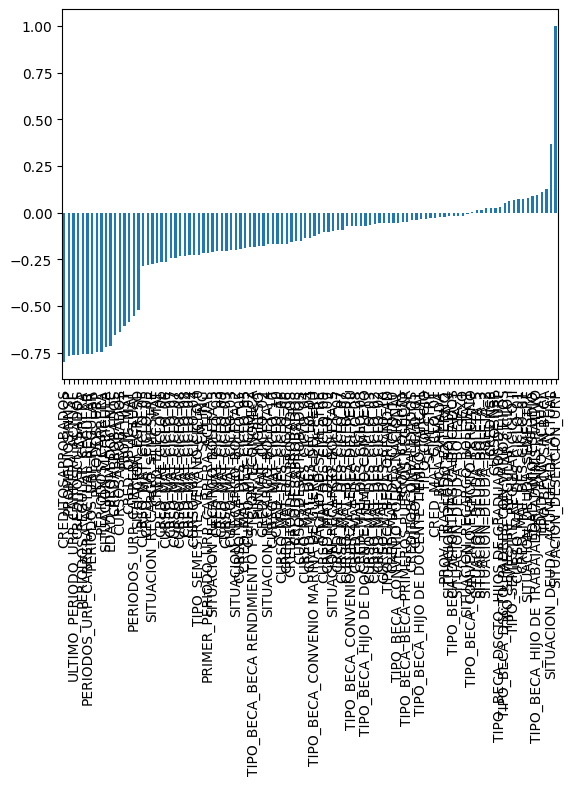

In [ ]:
# Grafica de correlaciones con la variable de salida
electronica_df.corr()["SITUACION_DESERCION_URP"][:-1].sort_values().plot(kind="bar");

In [ ]:
# Mostrar la dimension del dataset
electronica_df.shape

(5982, 108)

In [ ]:
electronica_df.dtypes.head(54)

SEMESTRE                      int64
SITUACION_MATRICULA           int64
CURSOSAPROBADOS               int64
CURSOSDESAPROBADOS            int64
CURSOSNSP                     int64
CREDAPROBADOS                 int64
CREDDESAPROBADOS              int64
CREDNSP                       int64
PROMEDIOSINNSP              float64
CRED_OBLIG_MAT                int64
CRED_ELEC_MAT                 int64
CURSO_MAT_CICLO_01            int64
CURSO_MAT_CICLO_02            int64
CURSO_MAT_CICLO_03            int64
CURSO_MAT_CICLO_04            int64
CURSO_MAT_CICLO_05            int64
CURSO_MAT_CICLO_06            int64
CURSO_MAT_CICLO_07            int64
CURSO_MAT_CICLO_08            int64
CURSO_MAT_CICLO_09            int64
CURSO_MAT_CICLO_10            int64
CRED_MAT_CICLO_01             int64
CRED_MAT_CICLO_02             int64
CRED_MAT_CICLO_03             int64
CRED_MAT_CICLO_04             int64
CRED_MAT_CICLO_05             int64
CRED_MAT_CICLO_06             int64
CRED_MAT_CICLO_07           

In [ ]:
electronica_df.dtypes.tail(54)

SITUACION_DEUDA_BOLETA_2                            int64
SITUACION_DEUDA_BOLETA_3                            int64
SITUACION_DEUDA_BOLETA_4                            int64
SITUACION_DEUDA_BOLETA_5                            int64
SITUACION_RECARGO_BOLETA_1                          int64
SITUACION_RECARGO_BOLETA_2                          int64
SITUACION_RECARGO_BOLETA_3                          int64
SITUACION_RECARGO_BOLETA_4                          int64
SITUACION_RECARGO_BOLETA_5                          int64
FACILIDAD_SEMESTRE                                  int64
SITUACION_RECARGO_SEMESTRE                          int64
SITUACION_DEUDA_SEMESTRE                            int64
SITUACION_DEUDA_ACUMULADA_ACTUAL                    int64
BECA_ARMADA                                         int64
SEXO                                                int64
EDAD_ANIO_ACTUAL                                    int64
TIPO_COLEGIO                                        int64
PROM_COLEGIO  

In [ ]:
#print(electronica_df.shape)

In [ ]:
# Mostrar la información de los datos
electronica_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5982 entries, 0 to 5981
Columns: 108 entries, SEMESTRE to TIPO_BECA_TRABAJADOR ADMINISTRATIVO
dtypes: float64(5), int64(85), uint8(18)
memory usage: 4.2 MB


In [ ]:
type(electronica_df)

pandas.core.frame.DataFrame

##2.3) División data Train & Test Split

In [ ]:
# Creación de la data de train y la data de test(se realiza una division entre la data de train y de test)
X_train, X_test, y_train, y_test = train_test_split(electronica_df.drop('SITUACION_DESERCION_URP',axis=1),
                                                    electronica_df.SITUACION_DESERCION_URP,
                                                    test_size=1/3,                         #se esta autilizando este criterio para la data de prueba, como es un conjunto de datos de corte transversal se puede ingresar y elegir en manera aleatorio las observaciones
                                                    random_state=123)                      # para replicar se esta utilizando el "random_state"

Como es un modelo que va aprender de los datos o a regular los hiperparametros de los datos yo podria dar mas data para la parte de entrenamiento podria utilizar 80% y 20%, podria plantear varios modelos dependiendo de esos valores

In [ ]:
print("Data entrenamiento - entrada: \n", X_train.shape,
      "\n Data prueba entrada: \n", X_test.shape,
      "\n Data entrenamiento - salida: \n", y_train.shape,
      "\n Data prueba salida: \n", y_test.shape)

Data entrenamiento - entrada: 
 (3988, 107) 
 Data prueba entrada: 
 (1994, 107) 
 Data entrenamiento - salida: 
 (3988,) 
 Data prueba salida: 
 (1994,)


**Synthetic Minority Oversampling Technique o SMOTE**

SMOTE agregar registros duplicados de la clase minoritaria a menudo no agrega ninguna información nueva al modelo.

Utilizando SMOTE las nuevas instancias se sintetizan a partir de los datos existentes.

SMOTE busca instancias de clase minoritaria y usa el vecino más cercano k para seleccionar un vecino más cercano aleatorio, y se crea una instancia sintética aleatoriamente en el espacio de características.

Otras opciones:
* Oversampling y Undersampling (Resampling - Remuestreo)
* BalancedBaggingClassifier

In [ ]:
# Importamos el balanceador
  #sm = SMOTE(sampling_strategy='minority', random_state=123)

  #Ajustamos a los datos
  #oversam_X, oversam_Y = sm.fit_resample(X_train, y_train)
  #oversampled = pd.concat([pd.DataFrame(oversam_Y), pd.DataFrame(oversam_X)], axis=1)

  #Copiamos para mayor facilidad
  #X_train=oversam_X.copy()
  #y_train=oversam_Y.copy()

**Estandarizar/normalización de datos**

La Palabra estandarizacion cuando el resultante o la formula que esta utilizando conocido como Z.
La diferencia entre la estandarizacion y normalizacion, es que el promedio va ser cero y la varianza  o desviacion estandar va ser 1 y la normalizacion los valores que vamos a tener como resultado va a estar emtre 0 y 1   

In [ ]:
# Importamos el escalador el que nos va a permitir standerizar
#escalador = StandardScaler()

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Crear un objeto MinMaxScaler
#scaler = MinMaxScaler()

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
# Aplicamos a los datos
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
# Mostramos
X_train

SEMESTRE  SITUACION_MATRICULA  CURSOSAPROBADOS  CURSOSDESAPROBADOS  \
1251     20112                    1                0                   3   
3104     20151                    1                5                   0   
4469     20141                    0                0                   0   
5802     20172                    1                1                   6   
4364     20161                    0                0                   0   
...        ...                  ...              ...                 ...   
5218     20152                    1                5                   0   
4060     20171                    0                0                   0   
1346     20152                    0                0                   0   
3454     20152                    0                0                   0   
3582     20172                    1                8                   0   

      CURSOSNSP  CREDAPROBADOS  CREDDESAPROBADOS  CREDNSP  PROMEDIOSINNSP  \
1251          2              0                10        6          1.2000   
3104          1             18                 0        3         11.6111   
4469          0              0                 0        0          0.0000   
5802          0              4                15        0          5.3784   
4364          0              0                 0        0          0.0000   
...         ...            ...               ...      ...             ...   
5218          0             15                 0        0         13.0000   
4060          0              0                 0        0          0.0000   
1346          0              0                 0        0          0.0000   
3454          0              0                 0        0          0.0000   
3582          0             22                 0        0         14.4545   

      CRED_OBLIG_MAT  ...  TIPO_BECA_CONVENIO MARINA DE GUERRA DEL PERU  \
1251              16  ...                                             0   
3104              21  ...                                             0   
4469               0  ...                                             0   
5802              18  ...                                             0   
4364               0  ...                                             0   
...              ...  ...                                           ...   
5218              15  ...                                             0   
4060               0  ...                                             0   
1346               0  ...                                             0   
3454               0  ...                                             0   
3582              16  ...                                             0   

      TIPO_BECA_CONVENIO POLICIA NACIONAL  TIPO_BECA_DEPORTITAS CALIFICADOS  \
1251                                    1                                 0   
3104                                    0                                 0   
4469                                    0                                 0   
5802                                    0                                 0   
4364                                    0                                 0   
...                                   ...                               ...   
5218                                    0                                 0   
4060                                    0                                 0   
1346                                    0                                 0   
3454                                    0                                 0   
3582                                    0                                 0   

      TIPO_BECA_DSCTO. HIJOS DE GRADUADOS DE URP  \
1251                                           0   
3104                                           0   
4469                                           0   
5802                                           0   
4364                                           0   
...   

In [ ]:
y_test

4217    1
1362    1
4303    1
4594    1
4749    0
       ..
3659    0
2787    1
1067    1
1397    0
2220    0
Name: SITUACION_DESERCION_URP, Length: 1994, dtype: int64

In [ ]:
#verificando que nuestro y_test tbn es estratificado =)
print("proporción target entrenamiento")
print(round(y_train.value_counts(normalize=True),2))
print("---------------------------------")
print("proporción target test")
print(round(y_test.value_counts(normalize=True),2))

proporción target entrenamiento
1    0.54
0    0.46
Name: SITUACION_DESERCION_URP, dtype: float64
---------------------------------
proporción target test
1    0.55
0    0.45
Name: SITUACION_DESERCION_URP, dtype: float64


## Modelo Arbol de Clasificación

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Hiper-parámetros (argumentos)

max_ depth : La profundidad máxima que pueden alcanzar los nodos del árbol de decisión, esto puede ayudar a evitar el sobreajuste, pero también podría tener el efecto contrario.

min _ samples _ leaf : La cantidad mínima de ejemplos que debe tener un nodo hoja.

min_samples_split : La cantidad mínima de ejemplos que debe tener un nodo de decisión para realizar una división , si la cantidad no es suficiente el nodo permanece como un nodo hoja.

criterion : La función que usará el árbol de decisión para realizar las divisiones, podemos usar Gini o Ganancia de información .

In [ ]:
# Generamos el árbol
import datetime

print('Inicio el entrenamiento a las:', datetime.datetime.now())
print('...')
modelo_ar1= DecisionTreeClassifier(criterion='gini',
                              max_depth= 10,
                              max_features = 8,
                              min_samples_leaf=20,
                              min_samples_split=30,
                              random_state =123)

print('...')
print('El entrenamiento finalizó a las:', datetime.datetime.now())

Inicio el entrenamiento a las: 2023-06-10 12:51:08.453936
...
...
El entrenamiento finalizó a las: 2023-06-10 12:51:08.456950


In [ ]:
# Ajustar a los datos
modelo_ar1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=8, min_samples_leaf=20,
                       min_samples_split=30, random_state=123)

Inicio el entrenamiento a las: 2023-06-10 12:51:16.142254
...
...
El entrenamiento finalizó a las: 2023-06-10 12:51:16.427948


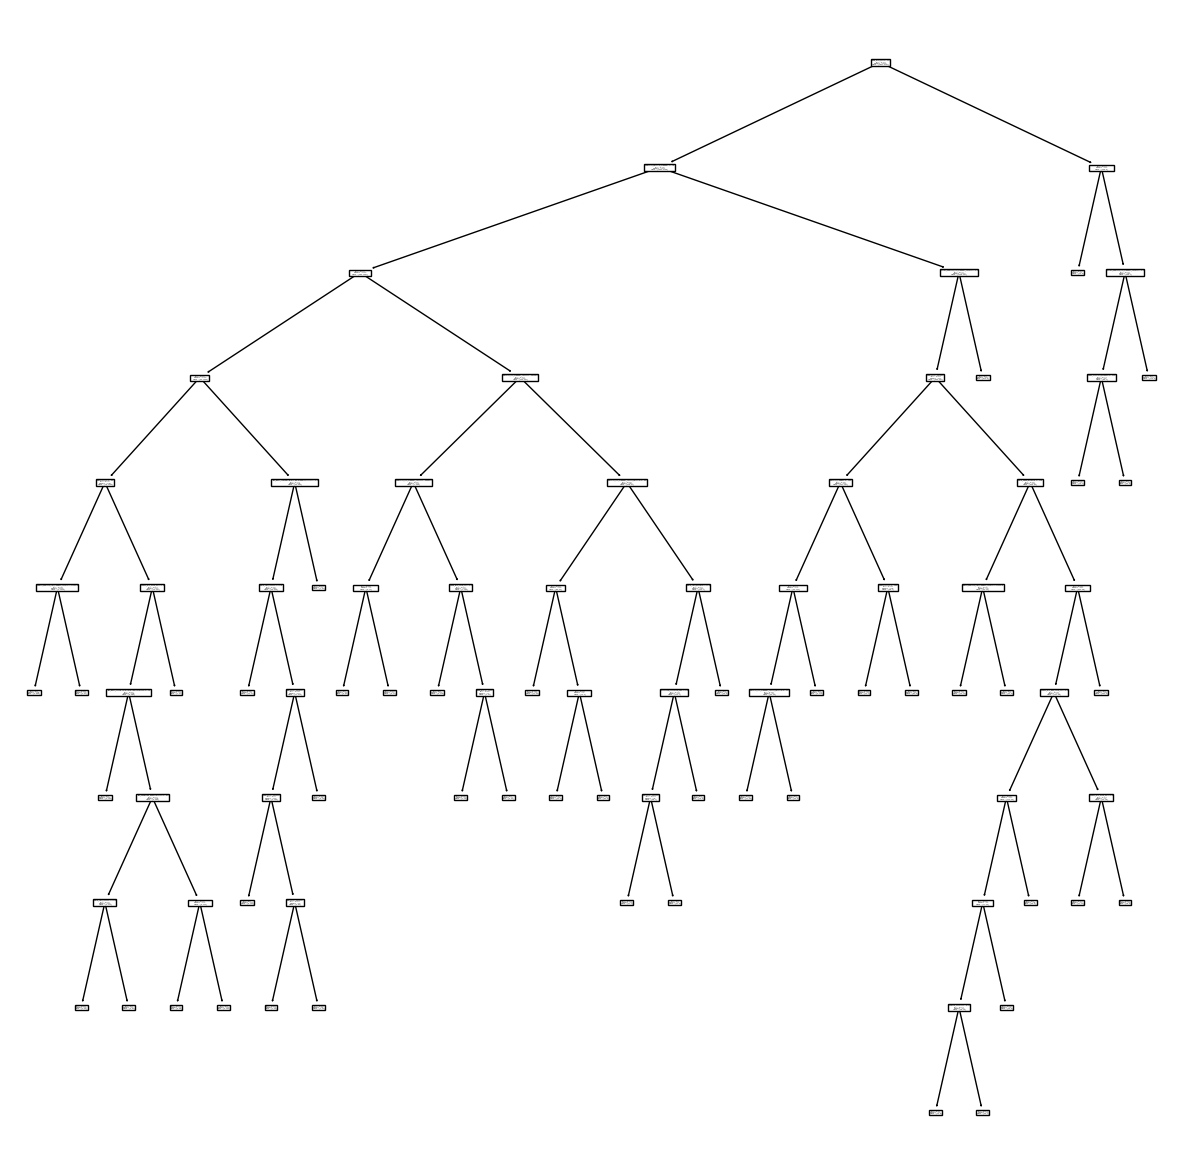

In [ ]:
# Mostrar las reglas
import datetime

print('Inicio el entrenamiento a las:', datetime.datetime.now())
print('...')

from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(modelo_ar1, feature_names=electronica_df.columns)

print('...')
print('El entrenamiento finalizó a las:', datetime.datetime.now())

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Graficamos el modelo realizado para mejor visualización
from sklearn.tree import export_graphviz
import graphviz, IPython

def draw_tree(tree, df):
    s = export_graphviz(tree, out_file=None, feature_names=df.columns, filled=True)
    return graphviz.Source(s)

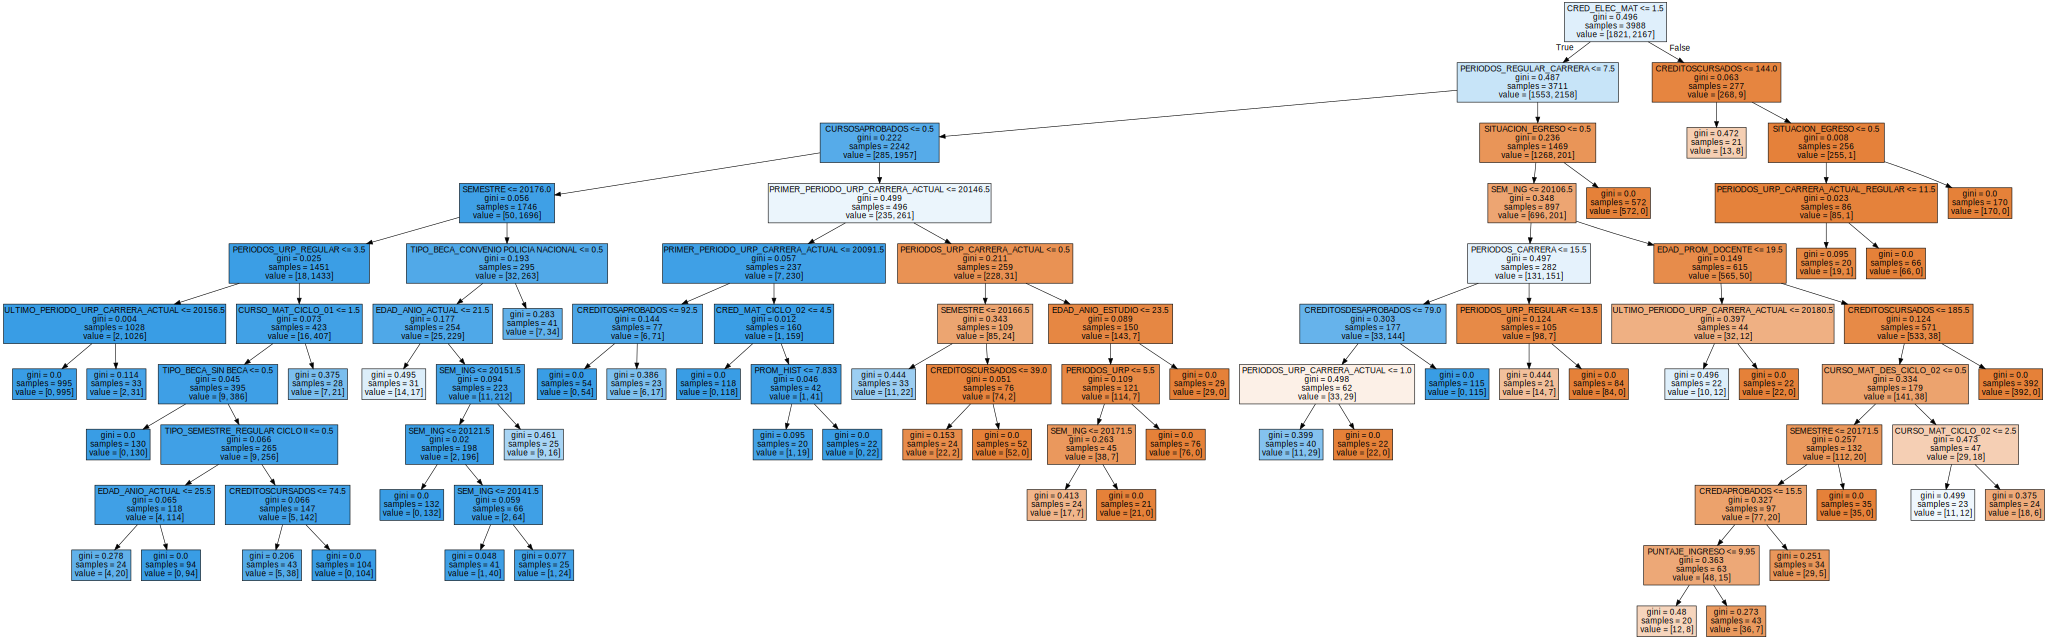

In [ ]:
draw_tree(modelo_ar1,X_train)

In [ ]:
1-((0/10)**2+(10/10)**2)

0.0

Predecir con el modelo

In [ ]:
X_test

SEMESTRE  SITUACION_MATRICULA  CURSOSAPROBADOS  CURSOSDESAPROBADOS  \
4217     20162                    0                0                   0   
1362     20131                    0                0                   0   
4303     20162                    0                0                   0   
4594     20162                    0                0                   0   
4749     20142                    1                7                   0   
...        ...                  ...              ...                 ...   
3659     20180                    1                2                   0   
2787     20162                    0                0                   0   
1067     20131                    0                0                   0   
1397     20101                    1                4                   2   
2220     20131                    1                4                   3   

      CURSOSNSP  CREDAPROBADOS  CREDDESAPROBADOS  CREDNSP  PROMEDIOSINNSP  \
4217          0              0                 0        0          0.0000   
1362          0              0                 0        0          0.0000   
4303          0              0                 0        0          0.0000   
4594          0              0                 0        0          0.0000   
4749          0             23                 0        0         14.5652   
...         ...            ...               ...      ...             ...   
3659          0              4                 0        0         14.5000   
2787          0              0                 0        0          0.0000   
1067          0              0                 0        0          0.0000   
1397          0             12                 7        0         10.6316   
2220          0             12                10        0         10.8636   

      CRED_OBLIG_MAT  ...  TIPO_BECA_CONVENIO MARINA DE GUERRA DEL PERU  \
4217               0  ...                                             0   
1362               0  ...                                             0   
4303               0  ...                                             0   
4594               0  ...                                             0   
4749              23  ...                                             0   
...              ...  ...                                           ...   
3659               4  ...                                             0   
2787               0  ...                                             0   
1067               0  ...                                             0   
1397              19  ...                                             0   
2220              19  ...                                             0   

      TIPO_BECA_CONVENIO POLICIA NACIONAL  TIPO_BECA_DEPORTITAS CALIFICADOS  \
4217                                    0                                 0   
1362                                    1                                 0   
4303                                    1                                 0   
4594                                    0                                 0   
4749                                    0                                 0   
...                                   ...                               ...   
3659                                    0                                 0   
2787                                    0                                 0   
1067                                    0                                 0   
1397                                    0                                 0   
2220                                    0                                 0   

      TIPO_BECA_DSCTO. HIJOS DE GRADUADOS DE URP  \
4217                                           0   
1362                                           0   
4303                                           0   
4594                                           0   
4749                                           0   
...   

In [ ]:
y_test

4217    1
1362    1
4303    1
4594    1
4749    0
       ..
3659    0
2787    1
1067    1
1397    0
2220    0
Name: SITUACION_DESERCION_URP, Length: 1994, dtype: int64

In [ ]:
# Predecimos en la data de entrenamiento
predichos_train=modelo_ar1.predict(X_train)

# Predecimos en la data de prueba
predichos_test= modelo_ar1.predict(X_test)

In [ ]:
predichos_train

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
predichos_test

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
# Realizamos la matriz de confusion para verificar los resultados
matriz_conf_train = metrics.confusion_matrix(y_train,predichos_train)
matriz_conf_test = metrics.confusion_matrix(y_test,predichos_test)
# Obtenemos el Accuracy train
accuracy_train=metrics.accuracy_score(y_train,predichos_train)
# Obtenemos el Accuracy test
accuracy_test=metrics.accuracy_score(y_test,predichos_test)
# Obtenemos la precision en la train
precision_train=metrics.precision_score(y_train,predichos_train)
# Obtenemos la precision en la test
precision_test=metrics.precision_score(y_test,predichos_test)
# Obtenemos el Recall en la train
recall_train=metrics.recall_score(y_train,predichos_train)
# Obtenemos el Recall en la test
recall_test=metrics.recall_score(y_test,predichos_test)

In [ ]:
# Matriz de confusion
print(" \n Matriz confusion: Train")
print(matriz_conf_train)

print(" \n Matriz confusion: Test")
print(matriz_conf_test)

# Accuracy
print(" \nAccuracy: Train")
print(accuracy_train)

print(" \n Accuracy: Test")
print(accuracy_test)

# Precision
print(" \n Precision: Train")
print(precision_train)

print(" \n Precision: Test")
print(precision_test)

# Recall
print(" \n Recall: Train")
print(recall_train)

print(" \n Recall: Test")
print(recall_test)

 
 Matriz confusion: Train
[[1721  100]
 [  51 2116]]
 
 Matriz confusion: Test
[[ 844   58]
 [  37 1055]]
 
Accuracy: Train
0.9621364092276831
 
 Accuracy: Test
0.9523570712136409
 
 Precision: Train
0.9548736462093863
 
 Precision: Test
0.9478885893980233
 
 Recall: Train
0.976465159206276
 
 Recall: Test
0.9661172161172161


In [ ]:
matrizconf_train= metrics.confusion_matrix(y_train,predichos_train)
matrizconf_test=metrics.confusion_matrix(y_test,predichos_test)
accuracy_train=metrics.accuracy_score(y_train,predichos_train)
accuracy_test=metrics.accuracy_score(y_test,predichos_test)
precision_train=metrics.precision_score(y_train,predichos_train)
precision_test=metrics.precision_score(y_test,predichos_test)
recall_train=metrics.recall_score(y_train,predichos_train)
recall_test=metrics.recall_score(y_test,predichos_test)
print("Matriz de confusión: Train : \n", matrizconf_train)
print("Matriz de confusión: test : \n ", matrizconf_test)
print("Accuracy: Train :", accuracy_train)
print("Accuracy: test :", accuracy_test)
print("precision: Train :", precision_train)
print("precision: test :", precision_test)
print("recall : train :", recall_train)
print("recall : test :", recall_test)

Matriz de confusión: Train : 
 [[1721  100]
 [  51 2116]]
Matriz de confusión: test : 
  [[ 844   58]
 [  37 1055]]
Accuracy: Train : 0.9621364092276831
Accuracy: test : 0.9523570712136409
precision: Train : 0.9548736462093863
precision: test : 0.9478885893980233
recall : train : 0.976465159206276
recall : test : 0.9661172161172161


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predichos_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       902
           1       0.95      0.97      0.96      1092

    accuracy                           0.95      1994
   macro avg       0.95      0.95      0.95      1994
weighted avg       0.95      0.95      0.95      1994



In [ ]:
X_train.shape

(3988, 107)

In [ ]:
m1 =modelo_ar1.fit(X_train,y_train)

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': electronica_df.drop(columns = "SITUACION_DESERCION_URP").columns,
                             'importancia': m1.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
74              PERIODOS_REGULAR_CARRERA     0.543448
86     PRIMER_PERIODO_URP_CARRERA_ACTUAL     0.101545
10                         CRED_ELEC_MAT     0.087815
2                        CURSOSAPROBADOS     0.086513
80                               SEM_ING     0.049272
..                                   ...          ...
37                CURSO_MAT_DES_CICLO_07     0.000000
36                CURSO_MAT_DES_CICLO_06     0.000000
35                CURSO_MAT_DES_CICLO_05     0.000000
34                CURSO_MAT_DES_CICLO_04     0.000000
106  TIPO_BECA_TRABAJADOR ADMINISTRATIVO     0.000000

[107 rows x 2 columns]

<Axes: ylabel='predictor'>

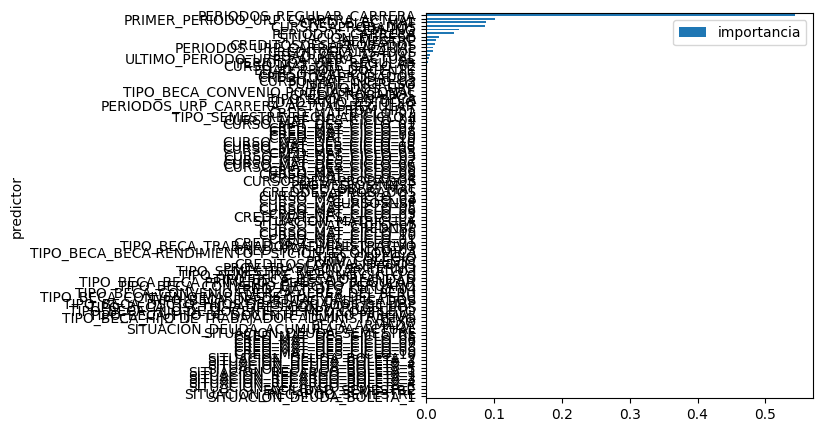

In [ ]:
importancia_predictores[['predictor','importancia']].sort_values(by=['importancia'],
                                                             ascending = [True]).plot(kind='barh',
                                                             x='predictor',
                                                             y='importancia',
                                                             legend=True,
                                                             figsize=(5, 5))

In [ ]:
# Transformamos a data frame - loss
#modelo_loss=pd.DataFrame(modelo_ar1.history.history)

##Algoritmo SHAP

**SHAP (SHapley Additive exPlanations) SHAP es una librería o framework que se basa en los valores de Shapley para averiguar qué variables o características son más relevantes en las predicciones obtenidas por un modelo. La finalidad de la técnica de SHAP es explicar la instancia x de un modelo predictivo calculando la contribución de cada variable a la predicción misma. **

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.4 MB/s eta 0:00:00


In [ ]:
import shap


In [ ]:
explainer = shap.TreeExplainer(modelo_ar1, X_test, )

In [ ]:
shap_values = explainer.shap_values(X_train)

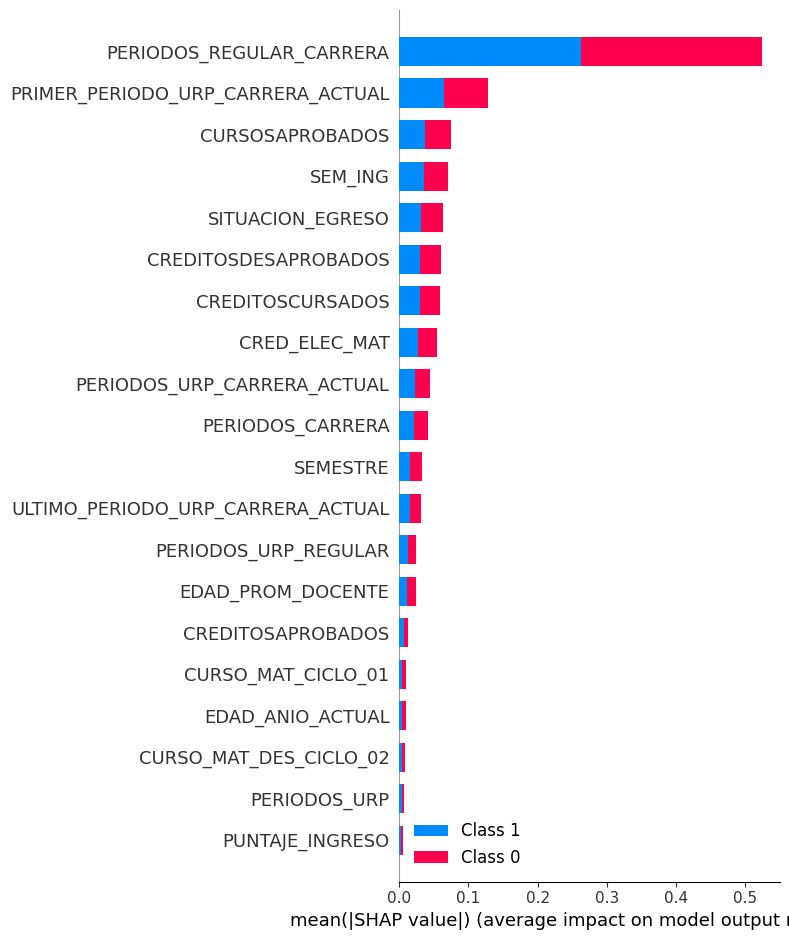

In [ ]:
shap.summary_plot(shap_values, X_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


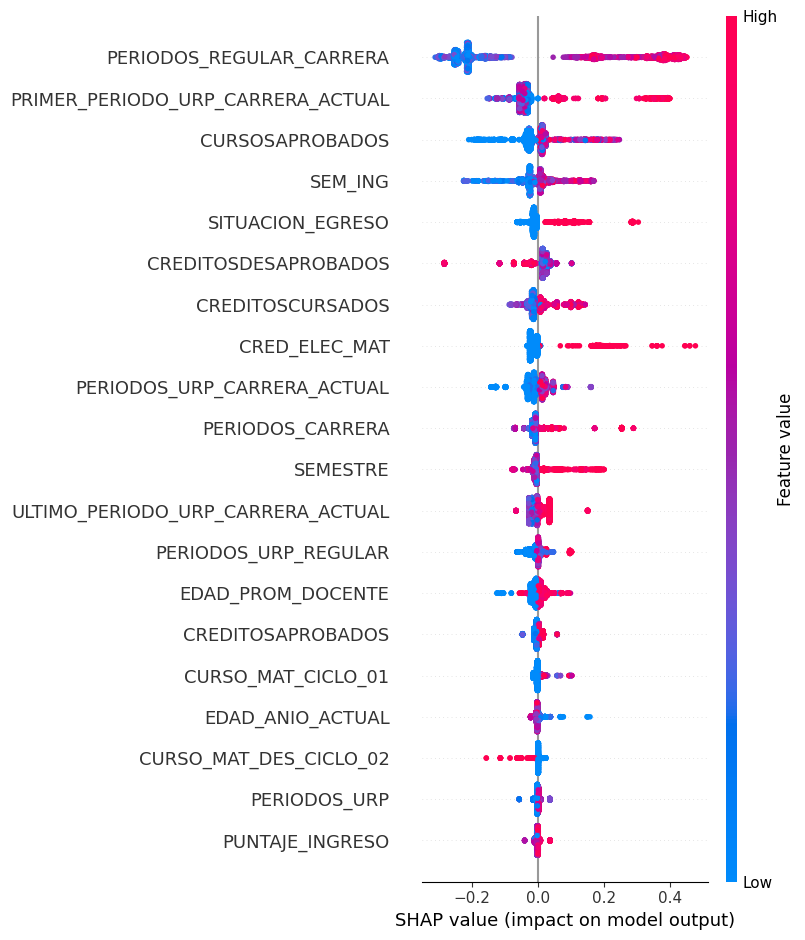

In [ ]:
shap.summary_plot(shap_values[0], X_train)

In [ ]:
thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
f1_scores = [0.86, 0.91, 0.96, 0.95, 0.91,]

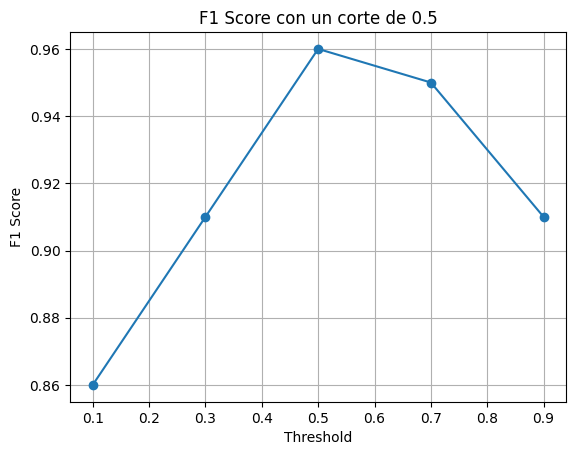

In [ ]:
plt.plot(thresholds, f1_scores, marker='o')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score con un corte de 0.5')
plt.grid(True)
plt.show()

In [ ]:
#shap.plots.heatmap(shap_values)

In [ ]:
#shap.plots.bar(shap_values.abs.mean(0))

In [ ]:
#explainer = shap.Explainer(modelo_ar1, X_test, model_output= 'probability')

In [ ]:
#shap_values = explainer(X_test)

In [ ]:
#shap_values

In [ ]:
#X_test.iloc[10]

In [ ]:
#shap_values[10, :]

In [ ]:
PERIODOS_REGULAR_CARRERA

#Modelo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Modelo basado en bosques aleatorios

import datetime

print('Inicio el entrenamiento a las:', datetime.datetime.now())
print('...')

modelo_rf21 = RandomForestClassifier(
    bootstrap=True,
    criterion='gini',
    max_depth = 2,
    max_features = 32,
    n_estimators = 4,
    min_samples_leaf=20,
    min_samples_split=35,
    oob_score = True,
    random_state=123)

print('...')
print('El entrenamiento finalizó a las:', datetime.datetime.now())

Inicio el entrenamiento a las: 2023-06-10 12:59:44.885838
...
...
El entrenamiento finalizó a las: 2023-06-10 12:59:44.898096


In [ ]:
modelo_rf21.fit(X_train, y_train)

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.


RandomForestClassifier(max_depth=2, max_features=32, min_samples_leaf=20,
                       min_samples_split=35, n_estimators=4, oob_score=True,
                       random_state=123)

Predecir

In [ ]:
# Predecimos en la data de entrenamiento
predichos_train2= modelo_rf21.predict(X_train)

# Predecimos en la data de prueba
predichos_test2 = modelo_rf21.predict(X_test)

In [ ]:
# Realizamos la matriz de confusion para verificar los resultados
matriz_conf_train2 = metrics.confusion_matrix(y_train,predichos_train2)
matriz_conf_test2 = metrics.confusion_matrix(y_test,predichos_test2)
# Obtenemos el Accuracy train
accuracy_train2=metrics.accuracy_score(y_train,predichos_train2)
# Obtenemos el Accuracy test
accuracy_test2=metrics.accuracy_score(y_test,predichos_test2)
# Obtenemos la precision en la train
precision_train2=metrics.precision_score(y_train,predichos_train2)
# Obtenemos la precision en la test
precision_test2=metrics.precision_score(y_test,predichos_test2)
# Obtenemos el Recall en la train
recall_train2=metrics.recall_score(y_train,predichos_train2)
# Obtenemos el Recall en la test
recall_test2=metrics.recall_score(y_test,predichos_test2)

In [ ]:
# Matriz de confusion
print(" \n Matriz confusion: Train")
print(matriz_conf_train2)

print(" \n Matriz confusion: Test")
print(matriz_conf_test2)

# Accuracy
print(" \nAccuracy: Train")
print(accuracy_train2)

print(" \n Accuracy: Test")
print(accuracy_test2)

# Precision
print(" \n Precision: Train")
print(precision_train2)

print(" \n Precision: Test")
print(precision_test2)

# Recall
print(" \n Recall: Train")
print(recall_train2)

print(" \n Recall: Test")
print(recall_test2)

 
 Matriz confusion: Train
[[1801   20]
 [ 108 2059]]
 
 Matriz confusion: Test
[[ 893    9]
 [  49 1043]]
 
Accuracy: Train
0.9679037111334002
 
 Accuracy: Test
0.970912738214644
 
 Precision: Train
0.9903799903799904
 
 Precision: Test
0.9914448669201521
 
 Recall: Train
0.9501615136132903
 
 Recall: Test
0.9551282051282052


In [ ]:
matriz_conf_train2 = metrics.confusion_matrix(y_train,predichos_train2)
matriz_conf_test2 = metrics.confusion_matrix(y_test,predichos_test2)
accuracy_train2=metrics.accuracy_score(y_train,predichos_train2)
accuracy_test2=metrics.accuracy_score(y_test,predichos_test2)
precision_train2=metrics.precision_score(y_train,predichos_train2)
precision_test2=metrics.precision_score(y_test,predichos_test2)
recall_train2=metrics.recall_score(y_train,predichos_train2)
recall_test2=metrics.recall_score(y_test,predichos_test2)
print("Matriz de confusión: Train : \n", matriz_conf_train2)
print("Matriz de confusión: test : \n ", matriz_conf_test2)
print("Accuracy: Train :", accuracy_train2)
print("Accuracy: test :", accuracy_test2)
print("precision: Train :", precision_train2)
print("precision: test :", precision_test2)
print("recall : train :", recall_train2)
print("recall : test :", recall_test2)

Matriz de confusión: Train : 
 [[1801   20]
 [ 108 2059]]
Matriz de confusión: test : 
  [[ 893    9]
 [  49 1043]]
Accuracy: Train : 0.9679037111334002
Accuracy: test : 0.970912738214644
precision: Train : 0.9903799903799904
precision: test : 0.9914448669201521
recall : train : 0.9501615136132903
recall : test : 0.9551282051282052


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predichos_test2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       902
           1       0.99      0.96      0.97      1092

    accuracy                           0.97      1994
   macro avg       0.97      0.97      0.97      1994
weighted avg       0.97      0.97      0.97      1994



In [ ]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RANDOM_STATE = 123

# Generate a binary classification dataset.
X, y = make_classification(
    n_samples=500,
    n_features=25,
    n_clusters_per_class=1,
    n_informative=15,
    random_state=RANDOM_STATE,
)

In [ ]:
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)


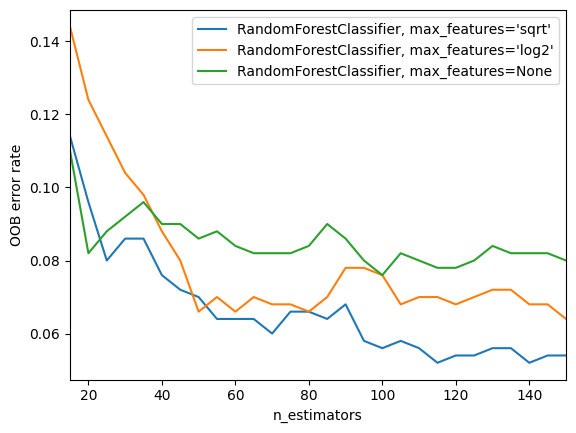

In [ ]:
# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

>0.1 0.854 (0.033)
>0.2 0.875 (0.031)
>0.3 0.885 (0.030)
>0.4 0.895 (0.025)
>0.5 0.894 (0.028)
>0.6 0.899 (0.022)
>0.7 0.898 (0.026)
>0.8 0.904 (0.026)
>0.9 0.898 (0.024)
>1.0 0.902 (0.020)


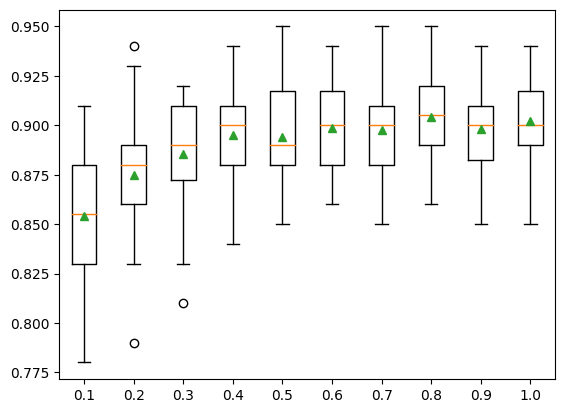

In [ ]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_modelo_rf21():
	modelo_rf21 = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		modelo_rf21[key] = RandomForestClassifier(max_samples=i)
	return modelo_rf21

# evaluate a given model using cross-validation
def evaluate_model(modelo_rf21, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(modelo_rf21, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate
modelo_rf21 = get_modelo_rf21()

# evaluate the models and store results
results, names = list(), list()
for name, modelo_rf21 in modelo_rf21.items():
	# evaluate the model
	scores = evaluate_model(modelo_rf21, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.900 (0.027)
>2 0.908 (0.025)
>3 0.903 (0.025)
>4 0.904 (0.026)
>5 0.901 (0.026)
>6 0.905 (0.027)
>7 0.903 (0.026)


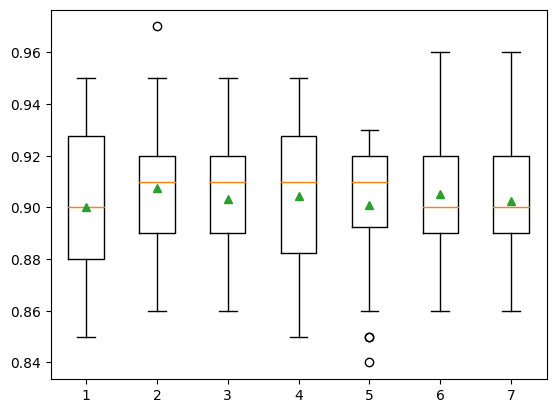

In [ ]:
# explore random forest number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 7
	for i in range(1,8):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(modelo_rf21, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(modelo_rf21, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(modelo_rf21, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# Transformamos a data frame - loss
modelo_loss=pd.DataFrame(modelo_rf21.history.history)

**Uso de memoria**

In [ ]:
import resource

# Obtener el uso actual de memoria en bytes
memory_usage = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
print(f"Uso de memoria: {memory_usage} bytes")

Uso de memoria: 1082692 bytes


**Uso de la CPU**

In [ ]:
import psutil

# Obtener el uso de la CPU en porcentaje
cpu_usage = psutil.cpu_percent(interval=1)
print(f"Uso de la CPU: {cpu_usage}%")

Uso de la CPU: 3.0%


In [ ]:
import shap


In [ ]:
f1_scores = [0.95, 0.96, 0.78, 0.99, 0.98,]

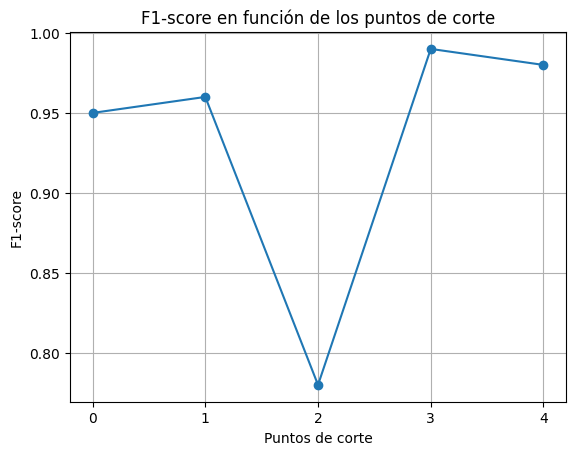

In [ ]:
thresholds = np.arange(len(f1_scores))  # Valores para el eje x
plt.plot(thresholds, f1_scores, marker='o')
plt.xlabel('Puntos de corte')
plt.ylabel('F1-score')
plt.title('F1-score en función de los puntos de corte')
plt.xticks(thresholds)
plt.grid(True)
plt.show()

##Algoritmo SHAP

**SHAP (SHapley Additive exPlanations) SHAP es una librería o framework que se basa en los valores de Shapley para averiguar qué variables o características son más relevantes en las predicciones obtenidas por un modelo. La finalidad de la técnica de SHAP es explicar la instancia x de un modelo predictivo calculando la contribución de cada variable a la predicción misma. **

In [ ]:
shap_values = shap.TreeExplainer(modelo_rf21).shap_values(X_train)

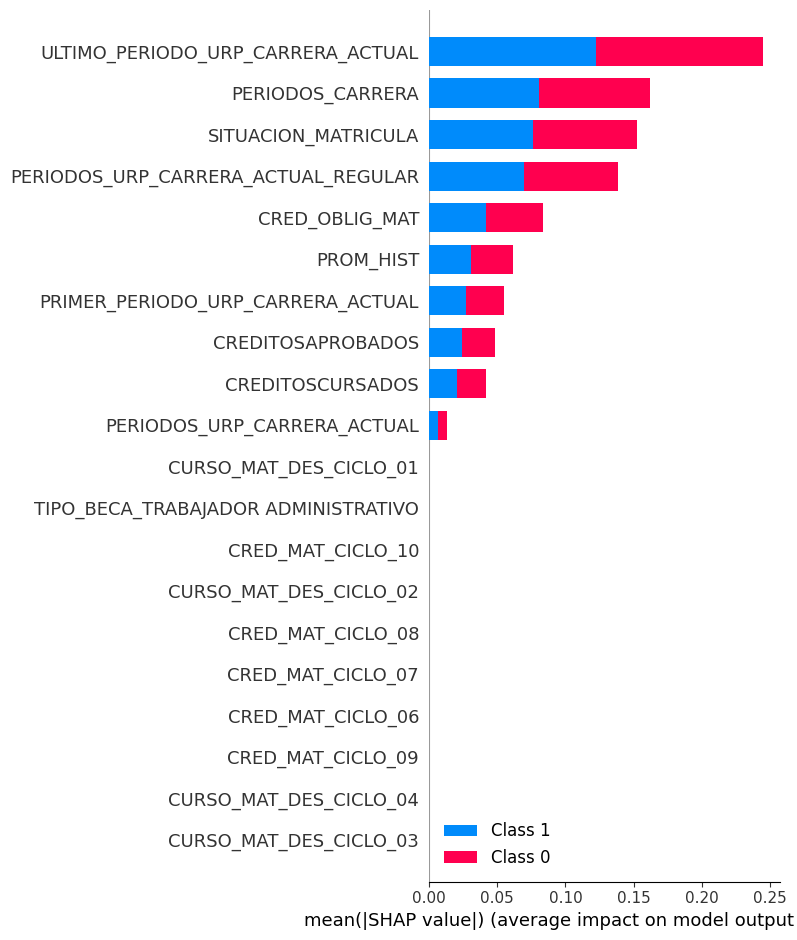

In [ ]:
shap.summary_plot(shap_values, X_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


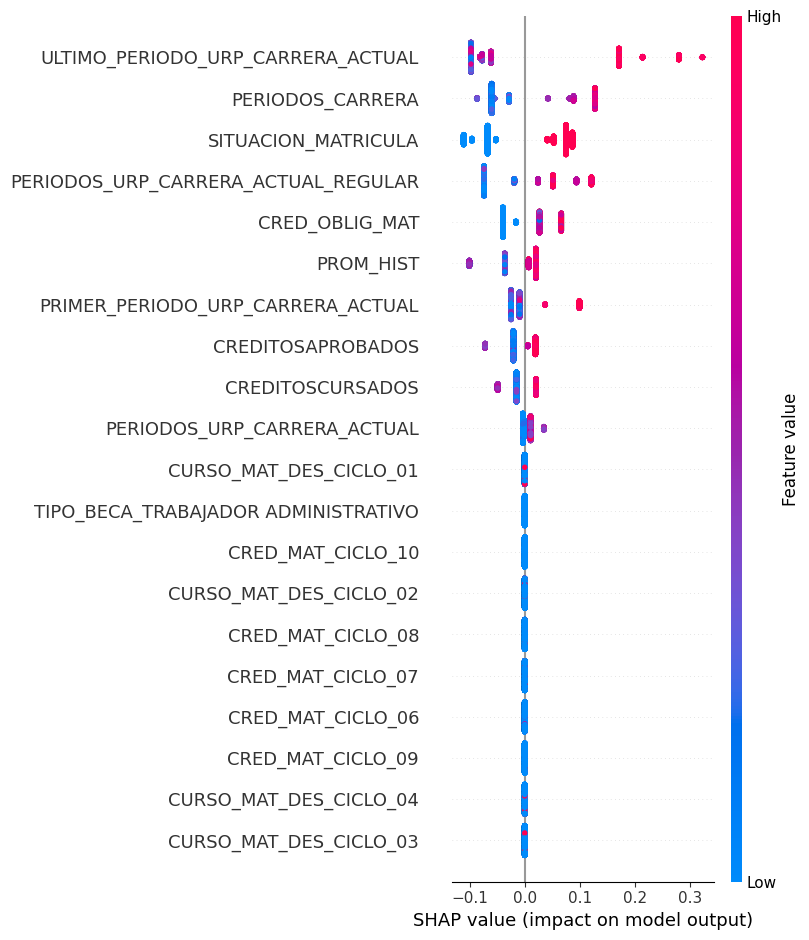

In [ ]:
shap.summary_plot(shap_values[0], X_train)

In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=274830b04337d6a9c5dcf37aa850f0dea3d9f948c9efa56943190d868cb4f790
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import numpy as np
import lime
import lime.lime_tabular
from sklearn.ensemble import RandomForestClassifier

In [ ]:
feature_names = electronica_df.columns.values

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names)

InvalidIndexError: ignored

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=electronica_df.columns.values, class_names='SITUACION_DESERCION_URP')

InvalidIndexError: ignored

In [ ]:
#shap_interaction_values  ​​=  shap . TreeExplainer ( modelo ) . shap_interaction_values ​​( X . iloc [: 2000 ,:])

In [ ]:
#forma _ resumen_plot ( shap_interaction_values ,  X. iloc [: 2000 ,:] )

#Modelo de Regresión Logística

In [ ]:
#Importar las librerías necesarias en Python.
import os
import pandas as pd ## Manejo de dataframes
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Creación de la data de train y la data de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(electronica_df.drop('SITUACION_DESERCION_URP', axis=1), electronica_df['SITUACION_DESERCION_URP'], test_size=0.30,random_state=123)

In [ ]:
#viendo la dimension de train y test
print("Dimension de las covariables")
print(X_train.shape)
print(X_test.shape)
print("Dimension de la target")
print(y_train.shape)
print(y_test.shape)

Dimension de las covariables
(4187, 107)
(1795, 107)
Dimension de la target
(4187,)
(1795,)


In [ ]:
# Importamos el escalador el que nos va a permitir standerizar
#escalador = StandardScaler()

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Aplicamos a los datos
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.55045872, 1.        , 0.2       , ..., 1.        , 0.        ,
        0.        ],
       [0.55045872, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.73394495, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.65137615, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.65137615, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.83486239, 1.        , 0.8       , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y_test.value_counts()

1    985
0    810
Name: SITUACION_DESERCION_URP, dtype: int64

In [ ]:
#comprobando que el test tiene el 30% de los datos totales
round(X_test.shape[0]/(X_train.shape[0]+X_test.shape[0]),2)

0.3

In [ ]:
y_train.value_counts()

1    2274
0    1913
Name: SITUACION_DESERCION_URP, dtype: int64

In [ ]:
#Importar las librerías necesarias en Python.
from statsmodels.tsa.stattools import grangercausalitytests
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import statsmodels.api as sm

In [ ]:
#electronica_df.corr().head(50)

In [ ]:
#######################################################################
##### Modelo de Regresión Logística ####
#######################################################################
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()

         Current function value: inf
         Iterations: 35


LinAlgError: ignored

#Modelamiento con redes neuronales

Red= [114 [20 10 5] 1]

**Estructura de la red para el caso**

Consideraciones:

  * Entradas (Variables de entradas)
  * Función de activación
  * Cantidad de capas y neuronas por capa (Prueba - error)

##Estructura de la red
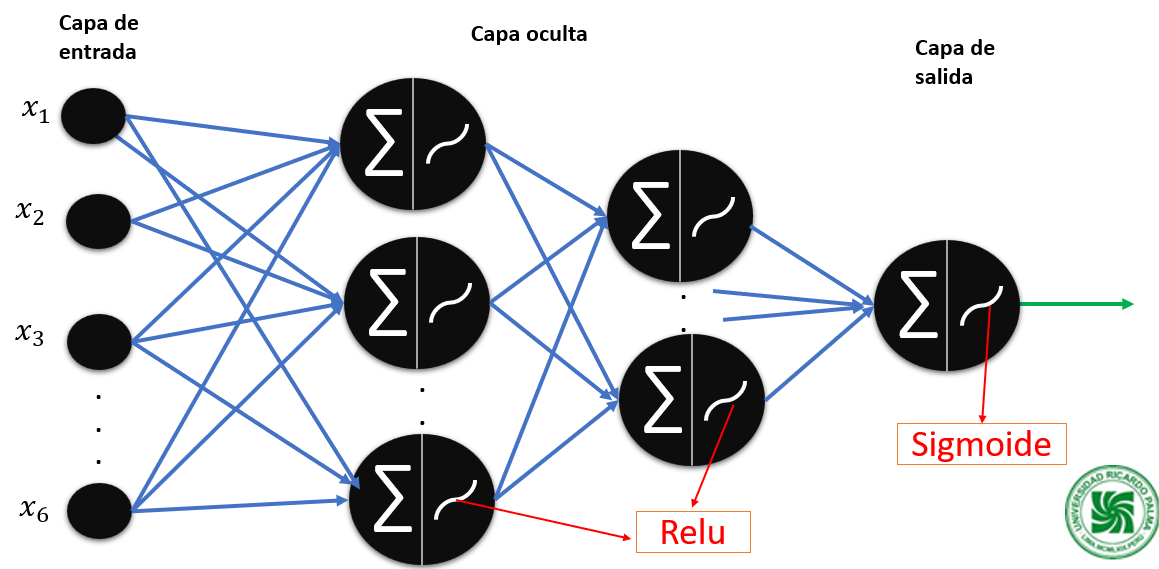

##Diseñando red, agregando la data de validacion

In [ ]:
# Inicializando la Red Neuronal
modelo_red1 = Sequential()

# kernel_initializer Define la forma como se asignará los Pesos iniciales Wi(creando un vector donde van atener los pesos iniciales, generar valores uniformes, con valores minimos -0.5 y maximo 0.5, estos son los pesos )
pesos_iniciales = RandomUniform(minval = -0.5, maxval = 0.5)

# Agregado la Capa de entrada y la primera capa oculta, la funcion "dense",la capa densa se le llama densamente conectada
# 114 Neuronas en la capa de entrada y 20 Neuronas en la primera capa oculta, "units" que son las cantidades unidades,que se va a considerar al momento de generar la arquitectura
modelo_red1.add(Dense(units = 20, kernel_initializer = pesos_iniciales, activation = 'relu', input_dim =X_train.shape[1]))

# Agregando capa oculta-10 neuronas, al "activation" que va a permitir dentro de la arquitectura considera un afuncion de activacion para la etapa de entrenamiento del modelo
modelo_red1.add(Dense(units = 10, kernel_initializer = pesos_iniciales, activation = 'relu'))

# Agregando capa oculta-5 neuronas, la funcion "Softmax" que se va a utilizar para evaluar o jugar con el umbral de las probalidades y tambien  generalmente problemas o tareas de clasificacion donde se tiene mas de dos clases aveces se utiliza cuando se tiene dos clase
modelo_red1.add(Dense(units = 5, kernel_initializer = pesos_iniciales, activation = 'relu'))

# Agregando capa de salida, normalmente se utilizan las funciones "relu" y "sigmoid", como es un caso de clasificacion va ver una sola neurona, Pero si hubiera dos capas de salidas y su funcion de activation = softmax(probalidadyprobalidad)
modelo_red1.add(Dense(units = 1, kernel_initializer = pesos_iniciales, activation = 'sigmoid'))

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
X_train.shape[1]

114

In [ ]:
# Imprimir Arquitectura de la Red
modelo_red1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 20)                2300      
                                                                 
 dense_39 (Dense)            (None, 10)                210       
                                                                 
 dense_40 (Dense)            (None, 5)                 55        
                                                                 
 dense_41 (Dense)            (None, 1)                 6         
                                                                 
Total params: 2,571
Trainable params: 2,571
Non-trainable params: 0
_________________________________________________________________


## **Compilar el modelo**

Como ya tenemos el modelo declarado con todos sus componentes ahora nos movemos a la fase de entrenamiento, para entrenar necesitamos una funcion de costo que es lo mas imporetamte para la etapa de entrenamiento.

El optimizador por defecto esta el "RMSprop:"

La funcion de perdida depende del probnlema si es de clasificacion o de regresion, lo de Clasificacion termina en perdidas probabilistica y lo de regresion termina en perdida de regresion.

La perdida probalistica podria utilizar el "binary_crossentropy" cuando tenemos tarea de dos clases y cuando tenemos mas de dos clases utilizamos "CategoricalCrossentropy class"

"binary_crossentropy function" se utiliza generalmente para casos binario

** La metrica no se utiliza para el entrenamiento, la metrica se utiliza es cuando ya tengo el modelo quiero ver como se esta comportando para evaluar un tema de sobreajuste.

Yo puedo hacer ala vez mientras que el modelo vaya entrenandose vaya haciendo la prediicion y ala vez calcular una metrica para ver el comportamiento de los resultados

** La metrica no se utiliza para el entrenamiento, la metrica se utiliza es cuando ya tengo el modelo quiero ver como se esta comportando para evaluar un tema de sobreajuste.

Yo puedo hacer ala vez mientras que el modelo vaya entrenandose vaya haciendo la prediicion y ala vez calcular una metrica para ver el comportamiento de los resultados    

In [ ]:
# Compilamos el modelo(toma el modelo para la etapa de compilacion utiliza esa funcion de perdida "binary_crossentropy" porque tenemos un problema de dos clases y el optimizador utilizamos "sgd")
#La funcion "compile" hace referencia a la configuracion del modelo para la etapa de entrenamiento
#El optimizador por defecto esta el "rmsprop", y "loss", "metrics", loss_weighted_metrics , y los demas no estan activados
modelo_red1.compile(optimizer = "sgd", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
# Entrenamiento de nuestra red neuronal(no esta utlizando el gradiento descenso original si no dgo minilote o minibath)
# En Keras utilizan modelo.fit(), para entrenar el modelo para un número fijo de epochs (iteraciones en un conjunto de datos
modelo_red1.fit(X_train,
           y_train,
           batch_size = 48,     #si no especificamos el valor de "batch_size" por defecto toma una pequeña muestra de 32  y 32 va ajustando
           epochs = 50,         #cuantas epocas se le deberia dar, por defecto es 1
           validation_data=(X_test, y_test),  # vla alidation_data para qu el momento de entrenamiento vaya validando
           verbose=1)                         # es para observar el comportamiento
# en la parte derecha se va observar el "tiempo", el "loss"error o perdidda en esa epoca  y accuracy, lo ideal seria que el error vaya disminuyendo y accuracy vaya aumentando

Epoch 1/50
84/84 [==============================] - 1s 5ms/step - loss: 0.6847 - accuracy: 0.5629 - val_loss: 0.6604 - val_accuracy: 0.6279
Epoch 2/50
84/84 [==============================] - 0s 3ms/step - loss: 0.6447 - accuracy: 0.6933 - val_loss: 0.6366 - val_accuracy: 0.7056
Epoch 3/50
84/84 [==============================] - 0s 3ms/step - loss: 0.6184 - accuracy: 0.7480 - val_loss: 0.6079 - val_accuracy: 0.7568
Epoch 4/50
84/84 [==============================] - 0s 3ms/step - loss: 0.5833 - accuracy: 0.7936 - val_loss: 0.5679 - val_accuracy: 0.7934
Epoch 5/50
84/84 [==============================] - 0s 3ms/step - loss: 0.5361 - accuracy: 0.8343 - val_loss: 0.5181 - val_accuracy: 0.8305
Epoch 6/50
84/84 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.8714 - val_loss: 0.4671 - val_accuracy: 0.8686
Epoch 7/50
84/84 [==============================] - 0s 3ms/step - loss: 0.4344 - accuracy: 0.8914 - val_loss: 0.4245 - val_accuracy: 0.8862
Epoch 8/50
84/84 [==

In [ ]:
# Transformamos a data frame - loss
modelo_loss=pd.DataFrame(modelo_red1.history.history)

In [ ]:
modelo_loss

loss  accuracy  val_loss  val_accuracy
0   0.684743  0.562939  0.660376      0.627884
1   0.644700  0.693330  0.636610      0.705617
2   0.618371  0.747994  0.607864      0.756770
3   0.583327  0.793631  0.567873      0.793380
4   0.536116  0.834253  0.518060      0.830491
5   0.483046  0.871364  0.467114      0.868606
6   0.434419  0.891424  0.424486      0.886158
7   0.395754  0.905968  0.390057      0.902207
8   0.364604  0.917252  0.362131      0.908726
9   0.338193  0.924273  0.338777      0.912738
10  0.315574  0.928285  0.318392      0.918255
11  0.295840  0.934804  0.300580      0.924774
12  0.278236  0.939318  0.285139      0.927783
13  0.262746  0.941825  0.271099      0.932798
14  0.248586  0.944584  0.259166      0.935306
15  0.235922  0.947593  0.247505      0.936810
16  0.224119  0.950100  0.237362      0.940321
17  0.213558  0.952357  0.228257      0.943330
18  0.204105  0.955115  0.219903      0.944835
19  0.195369  0.955617  0.212369      0.947844
20  0.187244  0.956871  0.205460      0.950351
21  0.179659  0.957874  0.199209      0.951354
22  0.172525  0.959629  0.193503      0.952357
23  0.165839  0.960883  0.188162      0.953862
24  0.159722  0.961635  0.183100      0.954865
25  0.153885  0.962638  0.178596      0.956369
26  0.148475  0.964895  0.174851      0.955868
27  0.143705  0.965145  0.170844      0.957372
28  0.139001  0.965396  0.166957      0.958877
29  0.134732  0.966901  0.163750      0.959378
30  0.130517  0.967904  0.161103      0.959378
31  0.126825  0.968405  0.157932      0.959880
32  0.123053  0.969157  0.154664      0.960381
33  0.119627  0.970160  0.152257      0.960883
34  0.116165  0.970913  0.149686      0.960883
35  0.112945  0.971916  0.147253      0.961384
36  0.109890  0.972919  0.144917      0.962387
37  0.107070  0.972668  0.142778      0.962387
38  0.104362  0.973420  0.140701      0.963390
39  0.101798  0.975175  0.138577      0.963390
40  0.099357  0.976179  0.136488      0.965396
41  0.096930  0.975928  0.134946      0.965898
42  0.094701  0.977432  0.133142      0.966399
43  0.092482  0.977934  0.130852      0.965396
44  0.090430  0.979188  0.129362      0.966399
45  0.088404  0.978937  0.128216      0.968405
46  0.086477  0.979438  0.126299      0.969408
47  0.084690  0.981194  0.124826      0.970411
48  0.082878  0.982197  0.122956      0.969408
49  0.081384  0.982447  0.120818      0.969408

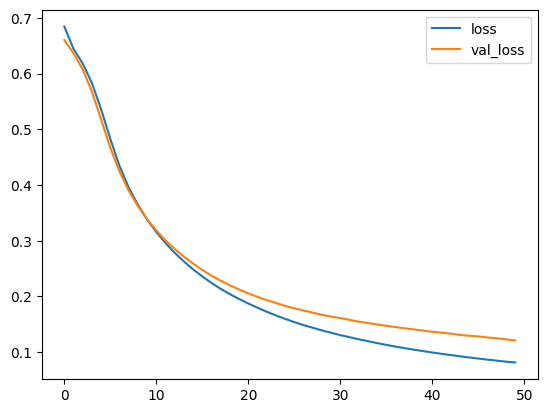

In [ ]:
# Graficar los resultados(lo ideal es que  las graficas esten mas cerca posible es lo mas optimo)
modelo_loss[['loss','val_loss']].plot()
plt.show()

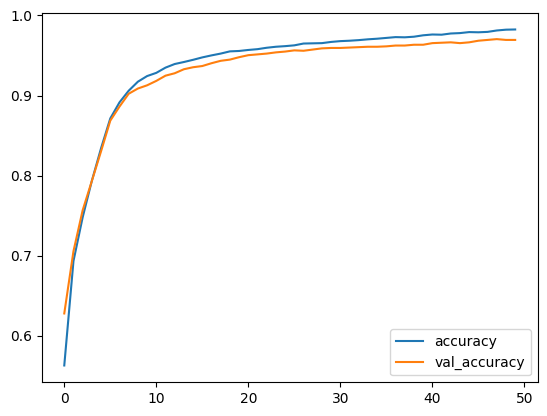

In [ ]:
# Graficar el acuracy
modelo_loss[['accuracy','val_accuracy']].plot()
plt.show()

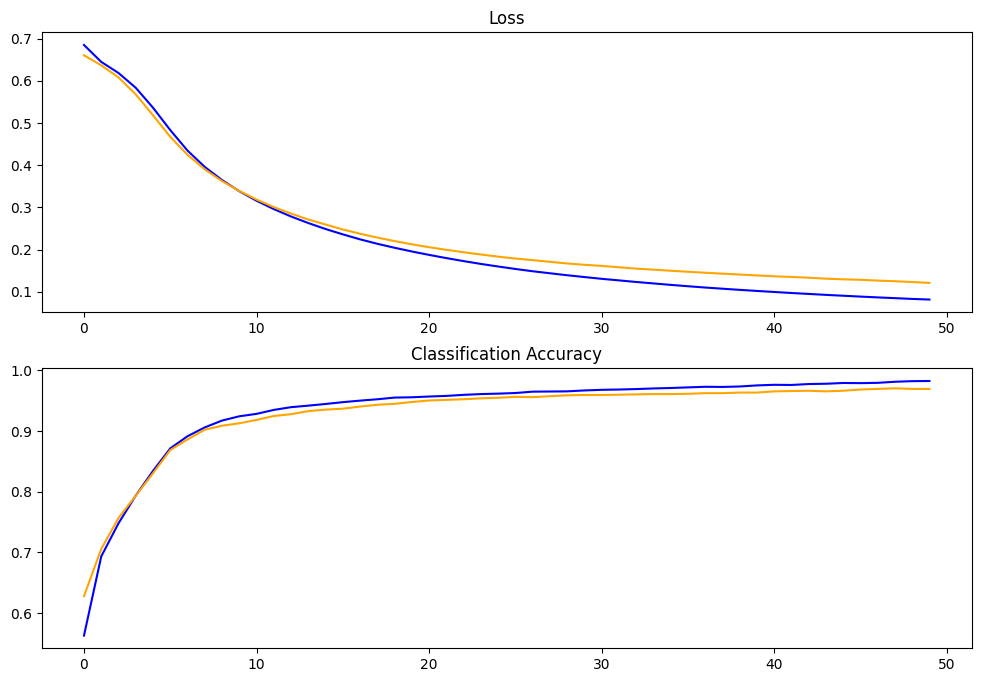

In [ ]:
# Graficar todo
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.title('Loss')
plt.plot(modelo_loss['loss'], color='blue', label='train')
plt.plot(modelo_loss['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(modelo_loss['accuracy'], color='blue', label='train')
plt.plot(modelo_loss['val_accuracy'], color='orange', label='test')
plt.show()

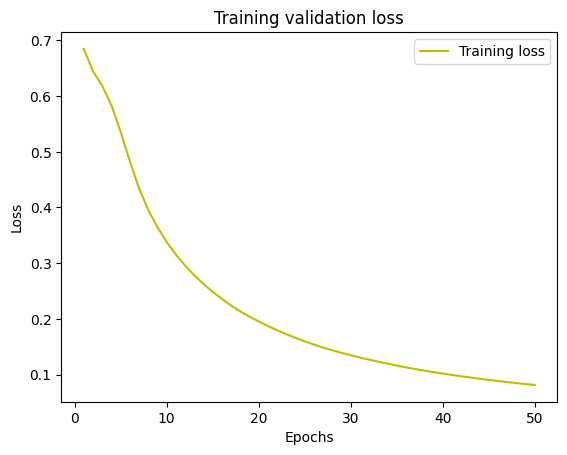

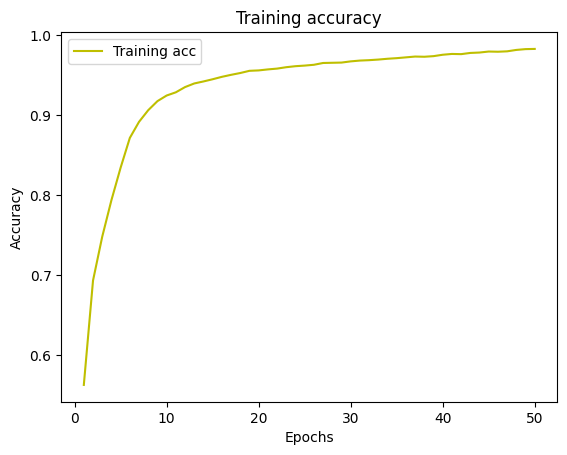

In [ ]:
# Loss
loss = modelo_loss['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy
acc = modelo_loss['accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

*Realizar las predicciones

Dentro el modelo que ya a sido entrenado lo voy autilizar para predecir con la funcion "predict" lava predecir con la train y lo guarda en predicho_train
Como hemos utilizado una sigmoide los valores van a ser 0 y 1.

Si yo utilizo una funcion de activacion "sigmoide" los resultados que van a salir de la red, va a ser: valores de 0 y 1 , el valor que sale lo comparamos con el valor real, el valor real es 0 y 1, si sale un 0.5,-1, estan en el 0-1

Si yo utilizo una funcion de activacion "relu" los resultados que van a salir de la red, van dar valores altos.


In [ ]:
# Predecimos en la train y test(el predichos_train esta haciendo las probalidades)
predichos_train_prop  = modelo_red1.predict(X_train)
predichos_train = (predichos_train_prop>0.5)
predichos_test_prop  = modelo_red1.predict(X_test)
predichos_test = (predichos_test_prop>0.5)
#el objetivo del entrenamiento para los dos, que quiero evaluar si se esta sobreajustando,porque la RN tienden A SOBREAJUSTARSE .

63/63 [==============================] - 0s 5ms/step


Si tenemos sobreajuste podemos hacer es reducir el N° de neuronas, cambiar algunos argumentos, tambien balancear los datos o observaciones y trabajar con los datos balanceados, si no se corrige el modelo se esta sobreajustando, puede ser que no estoy utilzando el umbral adecuado.

en Machine Learning se utiliza la curva ROC y dependiendo dela curva Roc se evalua el punto de corte.

In [ ]:
# Metricas
matrizconf_train= metrics.confusion_matrix(y_train,predichos_train)
matrizconf_test=metrics.confusion_matrix(y_test,predichos_test)
accuracy_train=metrics.accuracy_score(y_train,predichos_train)
accuracy_test=metrics.accuracy_score(y_test,predichos_test)
precision_train=metrics.precision_score(y_train,predichos_train)
precision_test=metrics.precision_score(y_test,predichos_test)
recall_train=metrics.recall_score(y_train,predichos_train)
recall_test=metrics.recall_score(y_test,predichos_test)
print("Matriz de confusión: Train : \n", matrizconf_train)
print("Matriz de confusión: test : \n ", matrizconf_test)
print("\n")
print("Accuracy: Train :", accuracy_train)
print("Accuracy: test :", accuracy_test)
print("\n")
print("precision: Train :", precision_train)
print("precision: test :", precision_test)
print("recall : train :", recall_train)
print("recall : test :", recall_test)

Matriz de confusión: Train : 
 [[1781   40]
 [  30 2137]]
Matriz de confusión: test : 
  [[ 866   36]
 [  25 1067]]


Accuracy: Train : 0.9824473420260782
Accuracy: test : 0.9694082246740221


precision: Train : 0.9816260909508497
precision: test : 0.9673617407071623
recall : train : 0.9861559760036918
recall : test : 0.9771062271062271


Segun los resultados no hay un tema de sobreajuste ni desbalanceo de datos(precision: test : 0.9859943977591037 y recall : test : 0.967032967032967) no hay mucha diferencia.

In [ ]:
# Con la función argmax(es la maxima probalidad y que me indique el resultado que esta mas cerca a cero o mas cerca a 1 )
#predichos_train=modelo.predict(X_train)
#classes_train=np.argmax(predichos_train,axis=1)
#classes_train

In [ ]:
# Conla función argmax
#predichos_test=modelo.predict(X_test)
#classes_test=np.argmax(predichos_test,axis=1)
#classes_test

In [ ]:
predichos_test = predichos_test.astype(int)
y_test = y_test.astype(int)
y_test =np.array(y_test)

# 20 primeros resultados a comparar
print("\nPredicciones (20 primeros):")
print("\n\tReal", "\t", "Predicción(N)","\t", "Predicción(O)")
for i in range(20):
  print(i, '\t', y_test[i], '\t ', predichos_test[i], '\t \t', predichos_test_prop[i])


Predicciones (20 primeros):

	Real 	 Predicción(N) 	 Predicción(O)
0 	 1 	  [1] 	 	 [0.9389168]
1 	 1 	  [1] 	 	 [0.9389168]
2 	 1 	  [1] 	 	 [0.9389168]
3 	 1 	  [1] 	 	 [0.9389168]
4 	 0 	  [0] 	 	 [1.3061248e-06]
5 	 0 	  [1] 	 	 [0.53218126]
6 	 1 	  [1] 	 	 [0.9389168]
7 	 1 	  [1] 	 	 [0.9389168]
8 	 1 	  [1] 	 	 [0.9389168]
9 	 0 	  [0] 	 	 [1.5406706e-06]
10 	 1 	  [1] 	 	 [0.74564093]
11 	 1 	  [1] 	 	 [0.9389168]
12 	 0 	  [0] 	 	 [7.987848e-06]
13 	 1 	  [1] 	 	 [0.9389168]
14 	 1 	  [1] 	 	 [0.9389168]
15 	 0 	  [0] 	 	 [0.0958562]
16 	 1 	  [1] 	 	 [0.9389168]
17 	 0 	  [0] 	 	 [2.2113678e-08]
18 	 0 	  [0] 	 	 [0.00218287]
19 	 0 	  [0] 	 	 [7.1494173e-06]


# Caso 1

El conjunto de datos de datos **HRAnalytics.csv** pertenece al área de Recursos Humanos de una empresa del sector de consultoría.

La organización HR, el área de Recursos humanos ha utilizado la analítica para realziar análisis de sus empleados.

El objetivo de la empresa es construir un modelo que permita identificar a los clientes con alta probabilidad de ser promovidos de la organización o empresa.

Las variables que se cuenta para esta tarea son:

$$
\begin{array}{ll}
\text { employee_id } & \text { ID del empleado } \\
\text { department } & \text { Departamento donde pertenece el empleado } \\
\text { region } & \text { Región de empleo} \\
\text { education } & \text { Nivel de educación del empleado } \\
\text { gender } & \text { Género del empleado }\\
\text { recruitment_channel } & \text { Canal de contratación del empleado} \\
\text { no_of_trainings } & \text { Número de entrenamientos completados el año anterior sobre habilidades blandas, habilidades técnicas, etc.} \\
\text { age } & \text { Edad del empleado } \\
\text { previous_year_rating } & \text { Calificación del empleado del año anterior } \\
\text { length_of_service } & \text {Tiempo de servicio del empleado en años } \\
\text { KPls_met }>80 \% & \text { Si el porcentaje de KPI (indicadores clave de rendimiento)> } 80 \%, \text { es } 1 \text { si no 0 } \\
\text { awards_won?} & \text { Si los premios ganados durante el año anterior, entonces } 1 \text { más } 0 \\
\text { avg_training_score } & \text { Puntaje promedio en evaluaciones de entrenamiento actuales } \\
\text { is_promoved } & \text { Recomendado para la promoción }
\end{array}
$$

In [ ]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

# Importar Keras y librerías adicionales
import keras
from  keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.metrics import classification_report
from sklearn import metrics as metrics
from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import load_model

1. **Importando conjunto de datos**

In [ ]:
# Conexion a Google Colaborative
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importamos los datos desde Drive
datos_hr=pd.read_csv("/content/drive/MyDrive/2022/2022-2/Posgrado/URP/Redes neuronales/Sesión 04/HRAnalytics.csv", sep=";")

In [ ]:
# Mostramos los datos
datos_hr.head()

In [ ]:
# Mostrar la dimensionalidad del dataset
datos_hr.shape

In [ ]:
# Mostrar la información de los datos
datos_hr.info()

2. **Análisis exploratorio de datos**

In [ ]:
# Eliminar la variable ID del empleado
datos_hr=datos_hr.drop(['employee_id'], axis=1)

In [ ]:
# Mostrar los descriptivos
datos_hr.describe().transpose()

In [ ]:
# Mostrar los descriptivos
datos_hr.describe(include="all").transpose()

2.1 Verificación de valores perdidos y corrección

In [ ]:
# Sumar la cantidar de valores perdidos según variables
datos_hr.isnull().sum()

In [ ]:
# Porcentaje de los valores ausentes
datos_hr.isnull().sum()/datos_hr.shape[0]*100

Procedimiento tentativo para el tratamiento de los valores ausentes

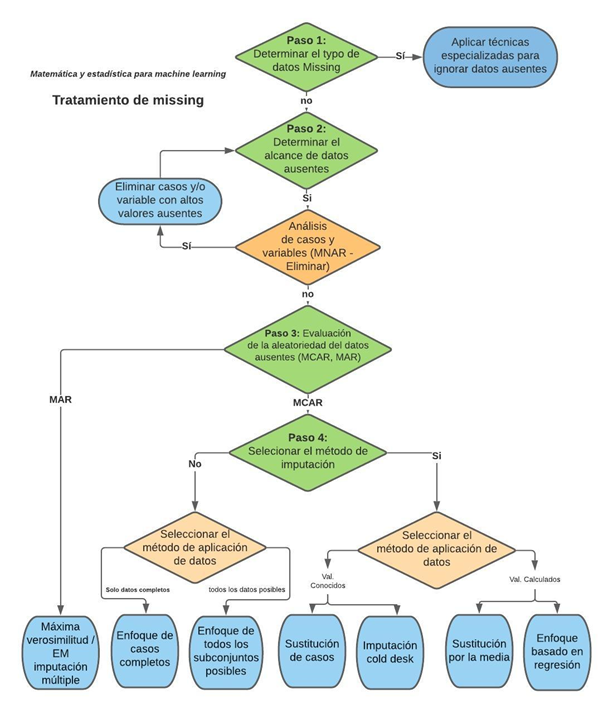

In [ ]:
# Criterio de eliminación 15% (valos cambia según regla de negocio o referencia)
nulos_p= datos_hr.isnull().sum()/datos_hr.shape[0]*100
porc_elimiar=15
datos_hr_snull=nulos_p[nulos_p<porc_elimiar]
varibles_ok=datos_hr_snull.index
datos_hr=datos_hr[varibles_ok]
datos_hr.head()

Evaluar patrones de comportamiento missing

In [ ]:
#Mapa de calor de missing
sns.heatmap(datos_hr.isnull(), cbar=False, cmap="bwr");


Evaluar correlaciones entre los datos perdidos

In [ ]:
#Evaluar la correlación de nulidad: qué tan fuertemente la presencia o ausencia de una variable afecta la presencia de otra:
msno.heatmap(datos_hr, figsize=(12,6));

Corrección de valores ausentes

In [ ]:
#Imputacion  (Secuencia de valores)
datos_hr = datos_hr.fillna(method = 'backfill')

In [ ]:
#Porcentaje de los valores ausentes
datos_hr.isnull().sum()/datos_hr.shape[0]*100

In [ ]:
# Mostrar los descriptivos
datos_hr.describe().transpose()

In [ ]:
# Mostrar los descriptivos
datos_hr.describe(include="all").transpose()

2.2 Gráficos estadísticos

In [ ]:
# Graficando la variable salida
sns.countplot(x="is_promoted", data=datos_hr);

Nota: Tenemos un caso de datos desbalanceados (recomendación) balancear los datos

In [ ]:
# Verificar correlaciones entre las variables
sns.heatmap(datos_hr.corr());

In [ ]:
# Correlaciones con la variable de salida
datos_hr.corr()["is_promoted"]

In [ ]:
# Grafica de correlaciones con la variable de salida
datos_hr.corr()["is_promoted"][:-1].sort_values().plot(kind="bar");

In [ ]:
# Generar un diagrama de dispersión de las variables de entrada con la salida
sns.scatterplot(x="is_promoted", y="KPI_met_80", data=datos_hr);

In [ ]:
# Cambiaando el gráfico tuilizando bins
plt.hist2d(datos_hr["KPI_met_80"],datos_hr["is_promoted"],
           bins=(2,2), cmap=plt.cm.cividis)
plt.colorbar()
plt.show()

In [ ]:
datos_hr["gender"].value_counts()

In [ ]:
cambio_nums = {"gender": {"m": 1, "f": 0}}

In [ ]:
datos_hr = datos_hr.replace(cambio_nums)
datos_hr.head()

In [ ]:
# Aplicación de varibles ficticias para las variables no numéricas con más de 2 categorias
columnas_dummies=['department', 'region', 'education', 'recruitment_channel']
datos_hr=pd.get_dummies(datos_hr, columns=columnas_dummies)

In [ ]:
datos_hr.head()

In [ ]:
datos_hr.info()

In [ ]:
# Creación de la data de train y la data de test
X_train, X_test, y_train, y_test = train_test_split(datos_hr.drop('is_promoted',axis=1),
                                                    datos_hr.is_promoted,
                                                    test_size=1/3,
                                                    random_state=123)

In [ ]:
print("Data entrenamiento - entrada: \n", X_train.shape,
      "\n Data prueba entrada: \n", X_test.shape,
      "\n Data entrenamiento - salida: \n", y_train.shape,
      "\n Data prueba salida: \n", y_test.shape)

3. Balanceo de datos:

**Synthetic Minority Oversampling Technique o SMOTE**

SMOTE agregar registros duplicados de la clase minoritaria a menudo no agrega ninguna información nueva al modelo.

Utilizando SMOTE las nuevas instancias se sintetizan a partir de los datos existentes.

SMOTE busca instancias de clase minoritaria y usa el vecino más cercano k para seleccionar un vecino más cercano aleatorio, y se crea una instancia sintética aleatoriamente en el espacio de características.

Otras opciones:
* Oversampling y Undersampling (Resampling - Remuestreo)
* BalancedBaggingClassifier




In [ ]:
# Importamos el balanceador
sm = SMOTE(sampling_strategy='minority', random_state=123)

In [ ]:
# Ajustamos a los datos
oversam_X, oversam_Y = sm.fit_resample(X_train, y_train)
oversampled = pd.concat([pd.DataFrame(oversam_Y), pd.DataFrame(oversam_X)], axis=1)

In [ ]:
# Mostramos para datos de entrada
oversam_X.shape

In [ ]:
# Mostramos para datos de salida
oversam_Y.shape

In [ ]:
# Copiamos para mayor facilidad
X_train=oversam_X.copy()
y_train=oversam_Y.copy()

Estandarización/normalización de datos

In [ ]:
# Importamos el escalador
escalador = StandardScaler()


In [ ]:
# Ajustamos
escalador.fit(X_train)

In [ ]:
# Aplicamos a los datos
X_train = escalador.fit_transform(X_train)
X_test = escalador.transform(X_test)

In [ ]:
# Mostramos
X_train

4. Modelamiento con redes neuronales

In [ ]:
# Iniciamos la arquitectura
modelo = Sequential()
# Agregamos una capa oculta con la misma cantidad de neuronas como entradas
modelo.add(Dense(units = X_train.shape[1],  activation = "relu", input_dim = X_train.shape[1]))
# Agregamos una capa oculta con la cantidad de neuronas de entrada dividido entre dos
modelo.add(Dense(units =np.round(X_train.shape[1]/2) ,  activation = "relu"))
# Agregamos la capa se salida
modelo.add(Dense(units =1 ,  activation = "sigmoid"))


**Optimizer**

La optimización es un proceso importante que optimiza los pesos de entrada al comparar la predicción y la función de pérdida. Keras proporciona bastantes optimizadores como módulo:


In [ ]:
# Compilamos el modelo
modelo.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
# Ajustamos a los datos de entrenamiento
modelo.fit(X_train,
           y_train,
           epochs = 50,
           validation_data=(X_test, y_test),
           verbose=1)

In [ ]:
# Transformamos a data frame - loss
modelo_loss=pd.DataFrame(modelo.history.history)

In [ ]:
# Graficamos
modelo_loss.plot()
plt.show()

In [ ]:
# Predecimos en la train y test
predichos_train  = modelo.predict(X_train)
predichos_train = (predichos_train>0.5)
predichos_test  = modelo.predict(X_test)
predichos_test = (predichos_test>0.5)


In [ ]:
# Metricas
matrizconf_train= metrics.confusion_matrix(y_train,predichos_train)
matrizconf_test=metrics.confusion_matrix(y_test,predichos_test)
accuracy_train=metrics.accuracy_score(y_train,predichos_train)
accuracy_test=metrics.accuracy_score(y_test,predichos_test)
precision_train=metrics.precision_score(y_train,predichos_train)
precision_test=metrics.precision_score(y_test,predichos_test)
recall_train=metrics.recall_score(y_train,predichos_train)
recall_test=metrics.recall_score(y_test,predichos_test)
print("Matriz de confusión: Train : \n", matrizconf_train)
print("Matriz de confusión: test : \n ", matrizconf_test)
print("Accuracy: Train :", accuracy_train)
print("Accuracy: test :", accuracy_test)
print("precision: Train :", precision_train)
print("precision: test :", precision_test)
print("recall : train :", recall_train)
print("recall : test :", recall_test)

In [ ]:
metricas=classification_report(y_test, predichos_test, labels=[1,0])
print(metricas)

**Evaluación y control de Overfitting**

4.1 **Utilizando Dropout:**

Dropout es método de regularización muy eficaz desde el punto de vista computacional, muy económico para reducir el sobreajuste y mejorar el error de generalización en redes neuronales profundas de todo tipo.

In [ ]:
# Iniciamos la arquitectura
modelo = Sequential()
# Agregamos una capa oculta con la misma cantidad de neuronas como entradas
modelo.add(Dense(units = X_train.shape[1],  activation = "relu", input_dim = X_train.shape[1]))
modelo.add(Dropout(0.3)) # desactivar el 30% de las neuronas en cada epochs
# Agregamos una capa oculta con la cantidad de neuronas de entrada dividido entre dos
modelo.add(Dense(units =np.round(X_train.shape[1]/2) ,  activation = "relu"))
modelo.add(Dropout(0.3))  # desactivar el 30% de las neuronas en cada epochs
# Agregamos la capa se salida
modelo.add(Dense(units =1 ,  activation = "sigmoid"))


In [ ]:
# Compilamos el modelo
modelo.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
# Ajustamos a los datos de entrenamiento
modelo.fit(X_train,
           y_train,
           epochs = 50,
           validation_data=(X_test, y_test),
           verbose=1)

In [ ]:
# Transformamos a data frame - loss
modelo_loss=pd.DataFrame(modelo.history.history)

In [ ]:
# Graficamos
modelo_loss.plot()
plt.show()

In [ ]:
# Predecimos en la train y test
predichos_train  = modelo.predict(X_train)
predichos_train = (predichos_train>0.5)
predichos_test  = modelo.predict(X_test)
predichos_test = (predichos_test>0.5)

In [ ]:
# Metricas
matrizconf_train= metrics.confusion_matrix(y_train,predichos_train)
matrizconf_test=metrics.confusion_matrix(y_test,predichos_test)
accuracy_train=metrics.accuracy_score(y_train,predichos_train)
accuracy_test=metrics.accuracy_score(y_test,predichos_test)
precision_train=metrics.precision_score(y_train,predichos_train)
precision_test=metrics.precision_score(y_test,predichos_test)
recall_train=metrics.recall_score(y_train,predichos_train)
recall_test=metrics.recall_score(y_test,predichos_test)
print("Matriz de confusión: Train : \n", matrizconf_train)
print("Matriz de confusión: test : \n ", matrizconf_test)
print("Accuracy: Train :", accuracy_train)
print("Accuracy: test :", accuracy_test)
print("precision: Train :", precision_train)
print("precision: test :", precision_test)
print("recall : train :", recall_train)
print("recall : test :", recall_test)

4.2 **Early Stopping:**

Early Stopping es una forma de regularización que se utiliza para evitar el sobreajuste cuando se entrena a un modelo con un método iterativo, como el descenso de gradiente.
Dichos métodos actualizan para que se ajuste mejor a los datos de entrenamiento con cada iteración. Hasta cierto punto, esto mejora el rendimiento en datos fuera del conjunto de entrenamiento.
Sin embargo, más allá de ese punto, mejorar el ajuste a los datos de entrenamiento se produce a expensas de un mayor error de generalización.

Las reglas de Early Stopping brindan orientación sobre cuántas iteraciones se pueden ejecutar antes de que comience a sobreajustarse.

Las reglas Early Stopping se han empleado en muchos métodos diferentes de aprendizaje automático, con cantidades variables de base teórica.

In [ ]:
# Iniciamos la arquitectura
modelo = Sequential()
# Agregamos una capa oculta con la misma cantidad de neuronas como entradas
modelo.add(Dense(units = X_train.shape[1],  activation = "relu", input_dim = X_train.shape[1]))

# Agregamos una capa oculta con la cantidad de neuronas de entrada dividido entre dos
modelo.add(Dense(units =np.round(X_train.shape[1]/2) ,  activation = "relu"))
# Agregamos la capa se salida
modelo.add(Dense(units =1 ,  activation = "sigmoid"))

In [ ]:
# Compilamos el modelo
modelo.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping('val_loss',
                           mode='min',
                           verbose=1,
                           patience=20)

In [ ]:
# Ajustamos a los datos de entrenamiento
modelo.fit(X_train,
           y_train,
           epochs = 20,
           validation_data=(X_test, y_test),
           callbacks=[early_stop],
           verbose=1)

In [ ]:
# Transformamos a data frame - loss
modelo_loss=pd.DataFrame(modelo.history.history)

In [ ]:
# Graficamos
modelo_loss.plot()
plt.show()

In [ ]:
# Predecimos en la train y test
predichos_train  = modelo.predict(X_train)
predichos_train = (predichos_train>0.5)
predichos_test  = modelo.predict(X_test)
predichos_test = (predichos_test>0.5)

In [ ]:
# Metricas
matrizconf_train= metrics.confusion_matrix(y_train,predichos_train)
matrizconf_test=metrics.confusion_matrix(y_test,predichos_test)
accuracy_train=metrics.accuracy_score(y_train,predichos_train)
accuracy_test=metrics.accuracy_score(y_test,predichos_test)
precision_train=metrics.precision_score(y_train,predichos_train)
precision_test=metrics.precision_score(y_test,predichos_test)
recall_train=metrics.recall_score(y_train,predichos_train)
recall_test=metrics.recall_score(y_test,predichos_test)
print("Matriz de confusión: Train : \n", matrizconf_train)
print("Matriz de confusión: test : \n ", matrizconf_test)
print("Accuracy: Train :", accuracy_train)
print("Accuracy: test :", accuracy_test)
print("precision: Train :", precision_train)
print("precision: test :", precision_test)
print("recall : train :", recall_train)
print("recall : test :", recall_test)

In [ ]:
# Iniciamos la arquitectura
modelo = Sequential()
# Agregamos una capa oculta con la misma cantidad de neuronas como entradas
modelo.add(Dense(units = X_train.shape[1],  activation = "relu", input_dim = X_train.shape[1]))
modelo.add(Dropout(0.3))
# Agregamos una capa oculta con la cantidad de neuronas de entrada dividido entre dos
modelo.add(Dense(units =np.round(X_train.shape[1]/2) ,  activation = "relu"))
modelo.add(Dropout(0.3))
# Agregamos la capa se salida
modelo.add(Dense(units =1 ,  activation = "sigmoid"))

In [ ]:
# Compilamos el modelo
modelo.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping('val_loss',
                           mode='min',
                           verbose=1,
                           patience=20)

**patience**: es valor que se utiliza para deternerse antes de completar las Epochs; a partir de un determinado valor de Epochs si no se mejora (error de datos de entrenamiento difere cada vez mpas con datos de validación) entonces se detendrá el entramiento.



In [ ]:
# Ajustamos a los datos de entrenamiento
modelo.fit(X_train,
           y_train,
           epochs = 30,
           validation_data=(X_test, y_test),
           callbacks=[early_stop],
           verbose=1)

In [ ]:
# Transformamos a data frame - loss
modelo_loss=pd.DataFrame(modelo.history.history)

In [ ]:
# Graficamos
modelo_loss.plot()
plt.show()

In [ ]:
# Predecimos en la train y test
predichos_train  = modelo.predict(X_train)
predichos_train = (predichos_train>0.5)
predichos_test  = modelo.predict(X_test)
predichos_test = (predichos_test>0.5)

In [ ]:
# Metricas
matrizconf_train= metrics.confusion_matrix(y_train,predichos_train)
matrizconf_test=metrics.confusion_matrix(y_test,predichos_test)
accuracy_train=metrics.accuracy_score(y_train,predichos_train)
accuracy_test=metrics.accuracy_score(y_test,predichos_test)
precision_train=metrics.precision_score(y_train,predichos_train)
precision_test=metrics.precision_score(y_test,predichos_test)
recall_train=metrics.recall_score(y_train,predichos_train)
recall_test=metrics.recall_score(y_test,predichos_test)
print("Matriz de confusión: Train : \n", matrizconf_train)
print("Matriz de confusión: test : \n ", matrizconf_test)
print("Accuracy: Train :", accuracy_train)
print("Accuracy: test :", accuracy_test)
print("precision: Train :", precision_train)
print("precision: test :", precision_test)
print("recall : train :", recall_train)
print("recall : test :", recall_test)

# Caso 2:

**Clasificación de préstamo"**

El proceso, definido como 'fijación de precios basada en el riesgo', utiliza un algoritmo sofisticado que aprovecha diferentes factores determinantes de un solicitante de préstamo.

La selección de factores significativos ayudará a desarrollar un algoritmo de predicción que pueda estimar las tasas de interés de los préstamos en función de la información de los clientes. Por un lado, conocer los factores ayudará a los consumidores y prestatarios a aumentar su solvencia crediticia y a ubicarse en una mejor posición para negociar para obtener una tasa de interés más baja.

Por otro lado, esto ayudará a las empresas de crédito a obtener una estimación inmediata de la tasa de interés fija basada en la información de los clientes. Aquí, su objetivo es utilizar un conjunto de datos de entrenamiento para predecir la categoría de tasa de préstamo (1/2/3) que se asignará a cada préstamo en nuestro conjunto de prueba.

Puede usar cualquier combinación de las funciones en el conjunto de datos para hacer sus predicciones de categoría de tasa de préstamo. Algunas características serán más fáciles de usar que otras.

https://www.kaggle.com/datasets/shravankoninti/janatahack-machine-learning-for-banking

Conjunto de datos:

El conjunto de datos contiene 164309 filas y 1 columnas con información de préstamos de un banco con diferentes parámetros como monto tomado, ingreso anual, propósito del préstamo, tasa de interés y toda la información relacionada con el historial del prestatario.

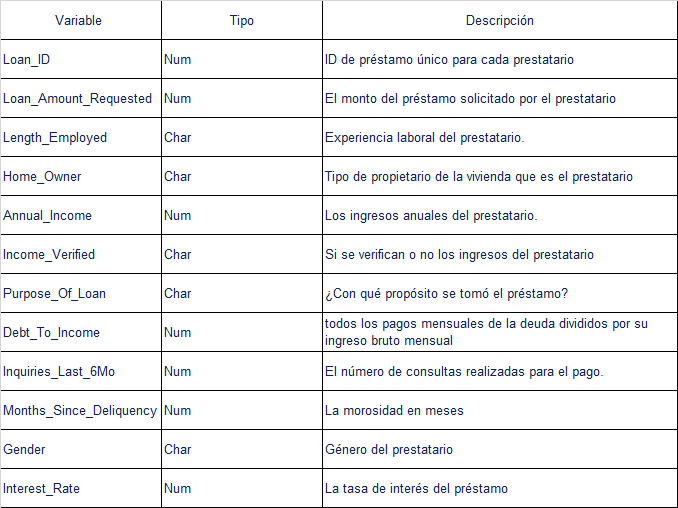

In [ ]:
# Conexion a Google Colaborative
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importamos los datos desde Drive
datos_banco=pd.read_csv("/content/drive/MyDrive/2022/2022-2/Posgrado/URP/Redes neuronales/Sesión 04/banca.csv",
                  sep=";",
                  encoding = "ISO-8859-1")

In [ ]:
# Mostramos los datos
datos_banco.head()

In [ ]:
# Mostrar la dimensionalidad del dataset
datos_banco.shape

In [ ]:
# Mostrar la información de los datos
datos_banco.info()

2. **Análisis exploratorio de datos**

In [ ]:
# Eliminar la variable ID del empleado
datos_b1=datos_banco.drop(['Loan_ID'], axis=1)

In [ ]:
# Mostrar los descriptivos
datos_b1.describe().transpose()

2.1 Verificación de valores perdidos y corrección

In [ ]:
# Sumar la cantidar de valores perdidos según variables
datos_b1.isnull().sum()

In [ ]:
# Porcentaje de los valores ausentes
datos_b1.isnull().sum()/datos_b1.shape[0]*100

Procedimiento tentativo para el tratamiento de los valores ausentes

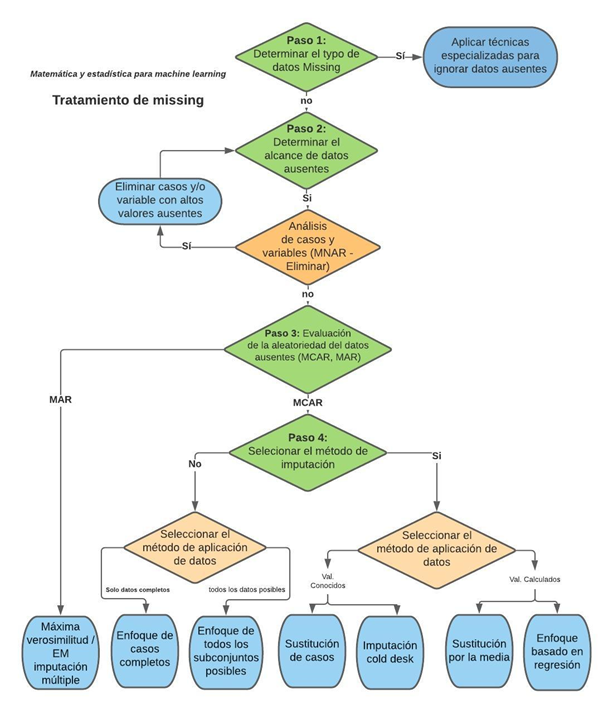

In [ ]:
# Crietrio de eliminación 15% (valos cambia según regla de negocio o referencia)
nulos_p= datos_b1.isnull().sum()/datos_b1.shape[0]*100
porc_eliminar=15
datos_banc_snull=nulos_p[nulos_p<porc_eliminar]
varibles_ok=datos_banc_snull.index
datos_b1=datos_b1[varibles_ok]
datos_b1.head()

In [ ]:
# Mostrar la dimensionalidad del dataset
datos_b1.shape

Evaluar patrones de comportamiento missing

In [ ]:
#Mapa de calor de missing
sns.heatmap(datos_b1.isnull(), cbar=False, cmap="bwr");


Evaluar correlaciones entre los datos perdidos

In [ ]:
#Evaluar la correlación de nulidad: qué tan fuertemente la presencia o ausencia de una variable afecta la presencia de otra:
msno.heatmap(datos_b1, figsize=(12,6));

Corrección de valores ausentes

In [ ]:
#Imputacion  (Secuencia de valores)
datos_b1 = datos_b1.fillna(method = 'backfill')

In [ ]:
#Porcentaje de los valores ausentes
datos_b1.isnull().sum()/datos_b1.shape[0]*100

In [ ]:
# Mostrar los descriptivos
datos_b1.describe().transpose()

In [ ]:
# Mostrar los descriptivos
datos_b1.describe(include="all").transpose()

2.2 Gráficos estadísticos

In [ ]:
# Graficando la variable salida
sns.countplot(x="Interest_Rate", data=datos_b1);

In [ ]:
# Verificar correlaciones entre las variables
sns.heatmap(datos_b1.corr());

In [ ]:
# Correlaciones con la variable de salida
datos_b1.corr()["Interest_Rate"]

In [ ]:
# Grafica de correlaciones con la variable de salida
datos_b1.corr()["Interest_Rate"][:-1].sort_values().plot(kind="bar");

In [ ]:
# Generar un diagrama de dispersión de las variables de entrada con la salida
sns.scatterplot(x="Interest_Rate", y="Inquiries_Last_6Mo", data=datos_b1);

In [ ]:
# Cambiaando el gráfico tuilizando bins
plt.hist2d(datos_b1["Inquiries_Last_6Mo"],datos_b1["Interest_Rate"],
           bins=(8,3), cmap=plt.cm.cividis)
plt.colorbar()
plt.show()

In [ ]:
# Graficamos para
datos_b1.groupby("Purpose_Of_Loan").agg("count")["Interest_Rate"].plot(kind="bar")
plt.show

In [ ]:
# Mostramos los datos
datos_b1.info()

In [ ]:
datos_b1.describe(include="all").transpose()

In [ ]:
# Mostramos la variable Length_Employed
datos_b1.Length_Employed.value_counts()

In [ ]:
# Asiganmos nuevos valores
cambio_nums = {"Gender": {"Male": 1, "Female": 0},
               "Length_Employed": {"< 1 year":0,
                                   "1 year":1,
                                   "2 years":2,
                                   "3 years":3,
                                   "4 years":4,
                                   "5 years":5,
                                   "6 years":6,
                                   "7 years":7,
                                   "8 years":8,
                                   "9 years":9,
                                   "10+ years":10}}

In [ ]:
# Reemplazamos los valores antiguos
datos_b1 = datos_b1.replace(cambio_nums)
datos_b1.head()

In [ ]:
# Mostramos
datos_b1.info()

In [ ]:
# Aplicación de varibles ficticias para las variables no numéricas con más de 2 categorias
columnas_dummies=['Income_Verified', 'Purpose_Of_Loan']
datos_b1=pd.get_dummies(datos_b1, columns=columnas_dummies)

In [ ]:
datos_b1.head()

In [ ]:
# Obtenemos los valores de entrada
X = datos_b1.drop('Interest_Rate',axis=1).values

In [ ]:
# Obtenemos los valores de salida
y = datos_b1['Interest_Rate']

In [ ]:
# Convertimos los valores de salida
y = pd.get_dummies(y)

In [ ]:
y

In [ ]:
# Asignamos solo valores
y = y.values

4. Data de entrenamiento y prueba

In [ ]:
# Creación de la data de train y la data de test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=1/3,
                                                    random_state=123)

In [ ]:
print("Data entrenamiento - entrada: \n", X_train.shape,
      "\n Data prueba entrada: \n", X_test.shape,
      "\n Data entrenamiento - salida: \n", y_train.shape,
      "\n Data prueba salida: \n", y_test.shape)

Estandarización/normalización de datos

In [ ]:
escalador = StandardScaler()


In [ ]:
escalador.fit(X_train)

In [ ]:
X_train = escalador.fit_transform(X_train)
X_test = escalador.transform(X_test)

In [ ]:
X_train

In [ ]:
y_train

4. Modelamiento con redes neuronales

In [ ]:
# Iniciamos la arquitectura
modelo = Sequential()
# Agregamos una capa oculta con la misma cantidad de neuronas como entradas
modelo.add(Dense(units = X_train.shape[1],  activation = "relu"))
# Agregamos una capa oculta con la cantidad de neuronas de entrada dividido entre dos
modelo.add(Dense(units =np.round(X_train.shape[1]/2) ,  activation = "relu"))
# Agregamos la capa se salida
modelo.add(Dense(units =3,  activation = "softmax"))


In [ ]:
# Compilamos el modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['categorical_accuracy'])


In [ ]:
# Ajustamos a los datos de entrenamiento
modelo.fit(x=X_train,
           y=y_train,
           epochs=60,
           batch_size=200,
           validation_data=(X_test, y_test),
           verbose=1
           )

In [ ]:
# Transformamos a data frame - loss
modelo_loss=pd.DataFrame(modelo.history.history)

In [ ]:
# Graficamos
modelo_loss.plot()
plt.show()

In [ ]:
# Predecimos en la train y test
predichos = modelo.predict(X_test)

In [ ]:
# Mostramos
predichos

In [ ]:
# Predecimos la clase
predichos_clase = np.argmax(modelo.predict(X_test),axis=1)

In [ ]:
# Mostramos
predichos_clase[:100]

In [ ]:
# Predecimos la clase real
predichos_clase_real = predichos_clase+1

In [ ]:
# Convertimos a data frame
test_clase = pd.DataFrame(y_test, columns = ['IR 1','IR 2','IR 3'])

In [ ]:
# Mostramos
test_clase.head()

In [ ]:
# Convertimos a una sola columna
test_clase["Clase Real"]=np.where(test_clase["IR 1"]==1,1,np.where(test_clase["IR 2"]==1,2,3))

In [ ]:
# Mostramos
test_clase["Clase Real"].head()

In [ ]:
# Creamos las clases
clases=[1, 2, 3]

In [ ]:
# Convertimos al formato
clase_ar = test_clase["Clase Real"].to_numpy()

In [ ]:
# Calculamos la matriz de confusión
confusion_matrix(clase_ar, predichos_clase_real, labels=clases)

Graficamos:

https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python/40068

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python/40068
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
# Generamos la matriz
matriz_conf = confusion_matrix(clase_ar, predichos_clase_real, labels=clases)
np.set_printoptions(precision=2)


In [ ]:
# matriz de confusión no normalizada
plt.figure()
plot_confusion_matrix(matriz_conf, classes=clases,
                      title='Confusion matrix sin normalización')

In [ ]:
# Guardar y cargar el modelo para posterior uso
modelo.save('modelo_pred_prestamo.h5')

In [ ]:
pwd

# Actividad opcional

* Aplicar regularización y optimizar los resultados para el caso inicial